In [225]:
import sys, os
sys.path.append('/home/narek/kaggle/roscosmos/Roscosmos Satellite Image Difference Challenge/')

import pickle
import pandas as pd
import matplotlib.pyplot as plt
from osgeo import gdal

from src.utils import *

In [226]:
df = pd.read_csv('../data/sample_submission.csv')

In [227]:
df.head()

,Id,mask
0,KVI_20180922_SCN3_UN91__KV1_20190804_SCN2_UN92,2 1
1,KV3_20180702_SCN2_UN47__KV4_20200829_SCN1_UN48,2 1
2,KVI_20180921_SCN9_UN89__KV4_20190622_SCN9_UN90,2 1
3,KV1_20180615_SCN9_UN39__KV3_20200522_SCN9_UN40,2 1
4,KV6_20190704_SCN2_UN57__KV5_20200521_SCN10_UN58,2 1


In [228]:
masks = []
for file in os.listdir('../data/mask/mask/'):
    mask = gdal.Open(f"../data/mask/mask/{file}")
    mask = mask.GetRasterBand(1).ReadAsArray()
    masks.append(mask)

In [229]:
os.listdir('../predicted_masks/')

['oof_siamese_unet_resnext101.pkl',
 'oof_unet++_resnet50.pkl',
 'unet++_se_resnext50_32x4d.pkl',
 'siamese_unet_seresnext50.pkl',
 'oof_unet++_resnext50.pkl',
 'unet++_resnext50.pkl',
 'oof_unet++_se_resnext50_32x4d.pkl',
 'siamese_unet_densenet161.pkl',
 'oof_siamese_unet_densenet161.pkl',
 'unet++_resnet50.pkl',
 'siamese_unet_resnext101.pkl',
 'siamese_unet_dpn92.pkl',
 'oof_siamese_unet_seresnext50.pkl',
 'oof_siamese_unet_dpn92.pkl']

In [242]:
model_list = [
    'siamese_unet_seresnext50.pkl',
    'unet++_resnext50.pkl',
    
    'siamese_unet_dpn92.pkl'
    # 'unet++_se_resnext50_32x4d.pkl',
    # 'siamese_unet_densenet161.pkl',
    # 'unet++_resnet50.pkl',
    # 'siamese_unet_resnext101.pkl',
]
preds = []
oof_preds = []
for i in model_list:
    print(i)
    oof_preds.append(pickle.load(open(f'../predicted_masks/oof_{i}', 'rb')))
    preds.append(pickle.load(open(f'../predicted_masks/{i}', 'rb')))

siamese_unet_seresnext50.pkl
unet++_resnext50.pkl
siamese_unet_dpn92.pkl


In [243]:
# for i in range(len(oof_preds)):
#     for j in range(len(oof_preds[0])):
#         oof_preds[i][j] = oof_preds[i][j] / oof_preds[i][j].max()

In [244]:
# for i in range(len(preds)):
#     for j in range(len(preds[0])):
#         preds[i][j] = preds[i][j] / preds[i][j].max()

In [245]:
oof_final = np.array(oof_preds).mean(axis=0)

In [246]:
def dice(im1, im2):
    # Compute Dice coefficient
    intersection = np.logical_and(im1, im2)

    return 2. * intersection.sum() / (im1.sum() + im2.sum())

In [247]:
val_res = []
for i in range(len(masks)):
    dice_metric = dice(masks[i], oof_final[i] > 0.5)
    print(dice_metric)
    val_res.append(dice_metric)
print("MEAN:", np.mean(val_res))

0.9430394431554524
0.9340394295302014
0.9497332106715731
0.9274770173646578
0.9614864864864865
MEAN: 0.9431551174416744


In [248]:
final = np.array(preds).mean(axis=0)

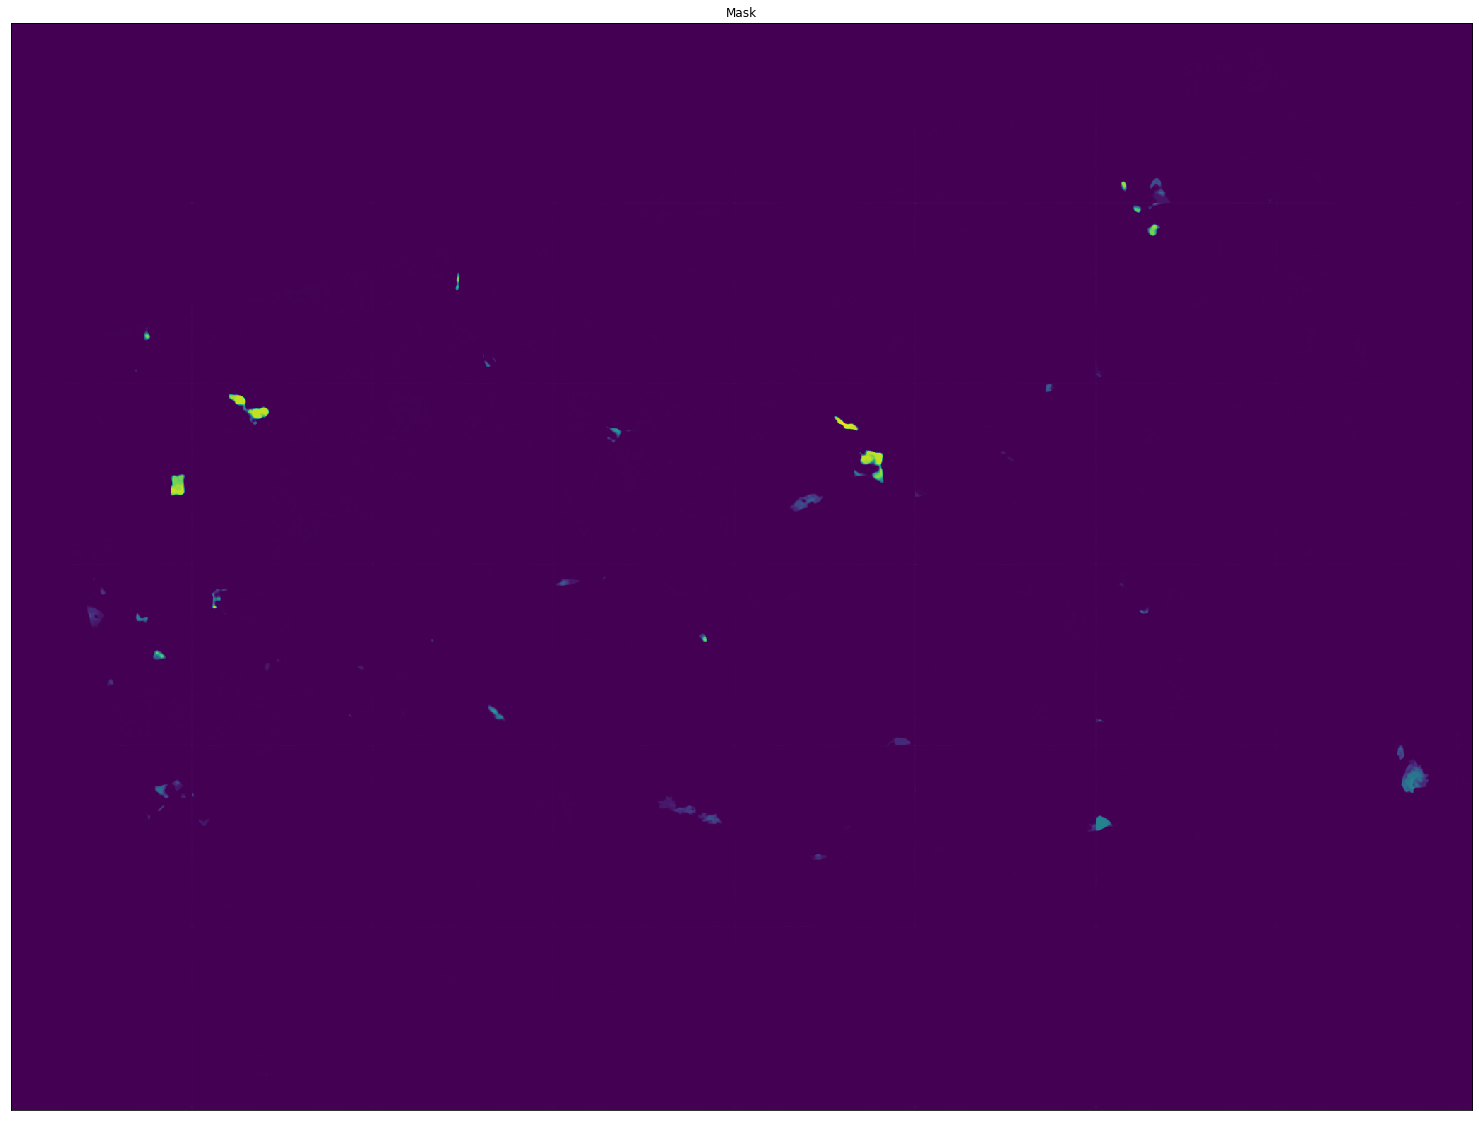

In [265]:
visualize(mask=final[0])

In [ ]:
visualize(mask=preds[2][3].astype(float))

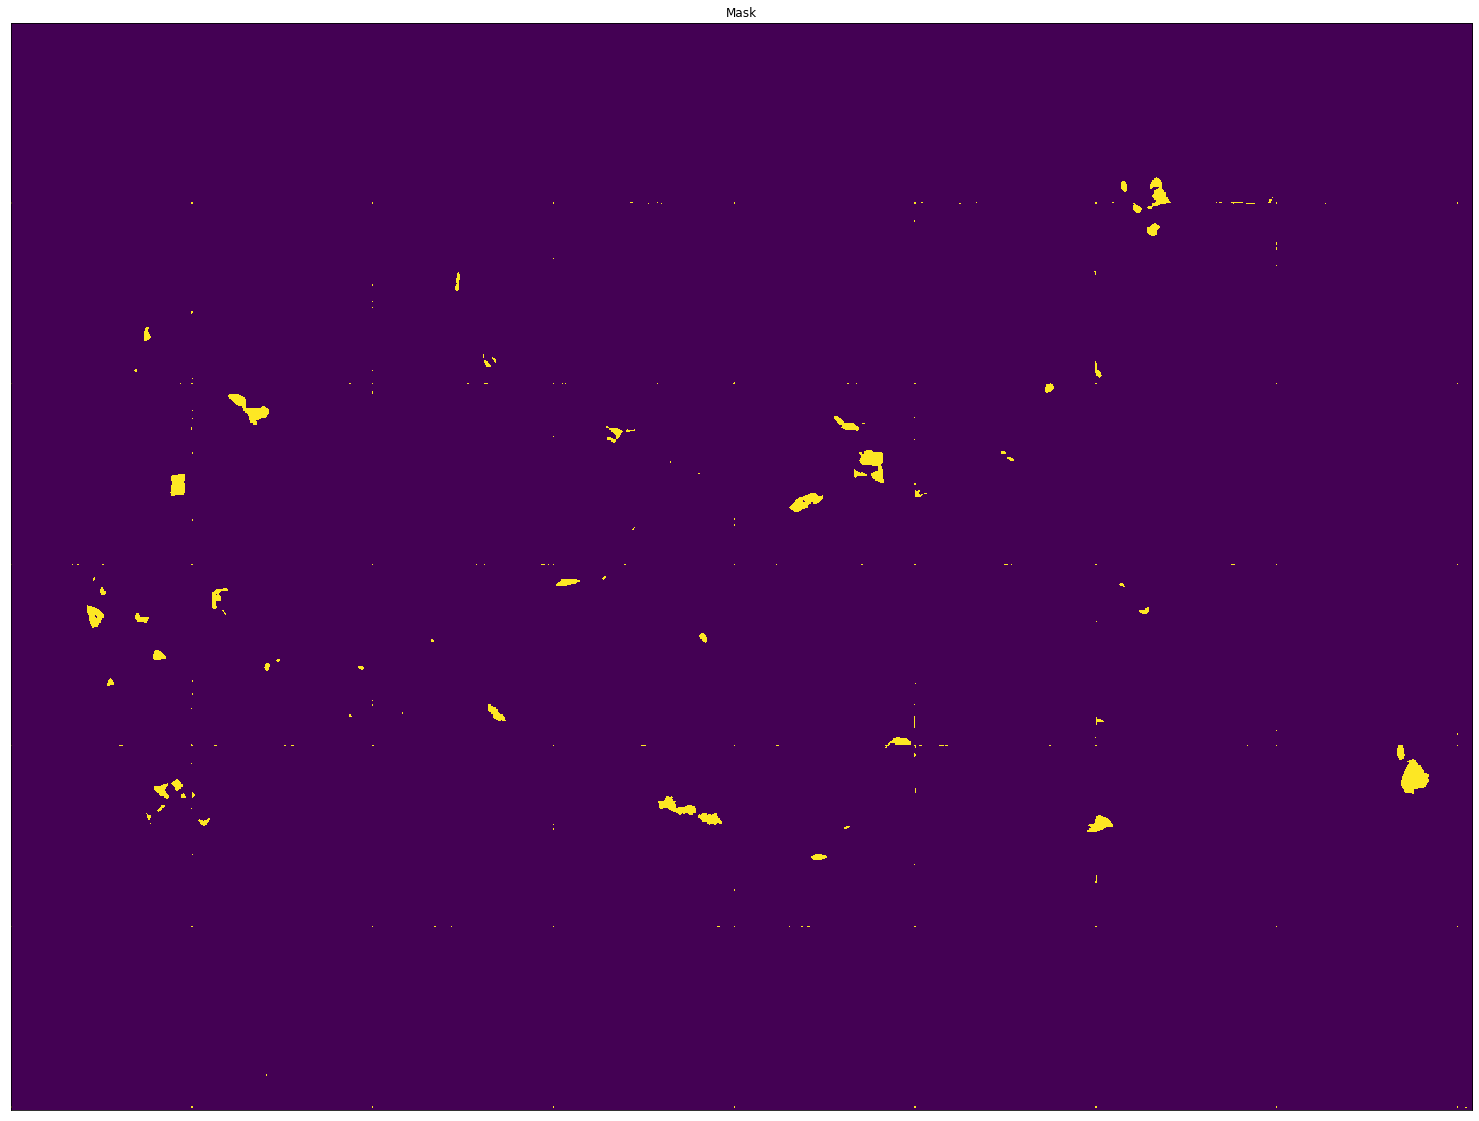

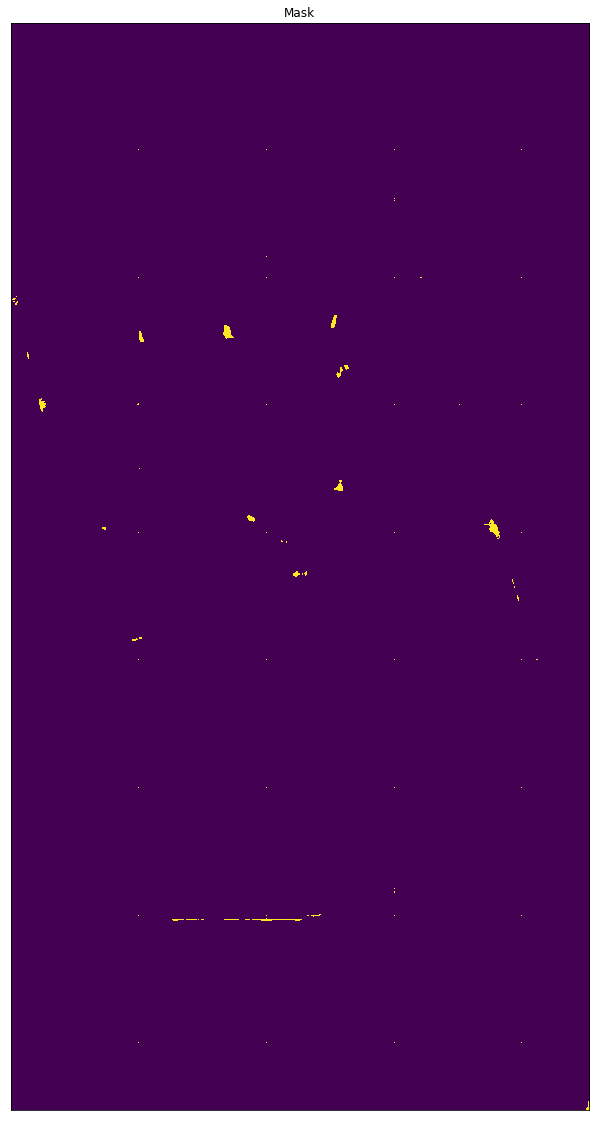

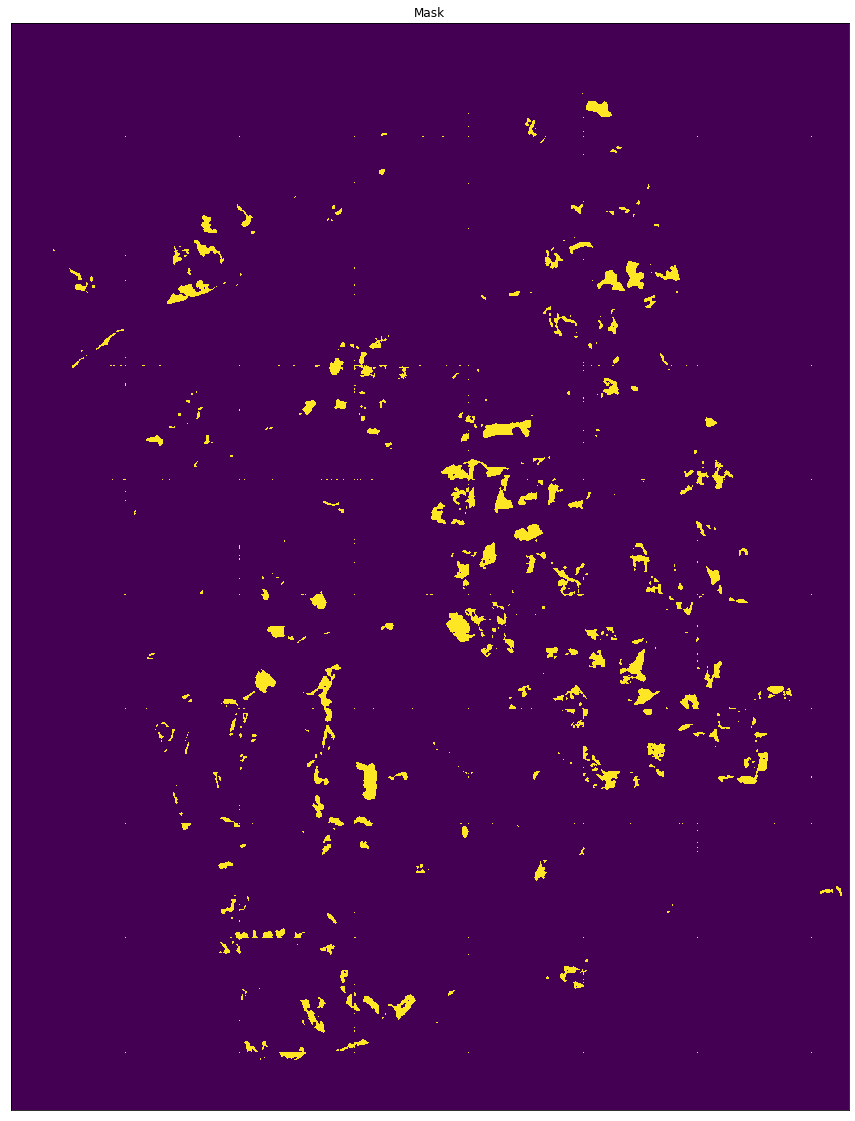

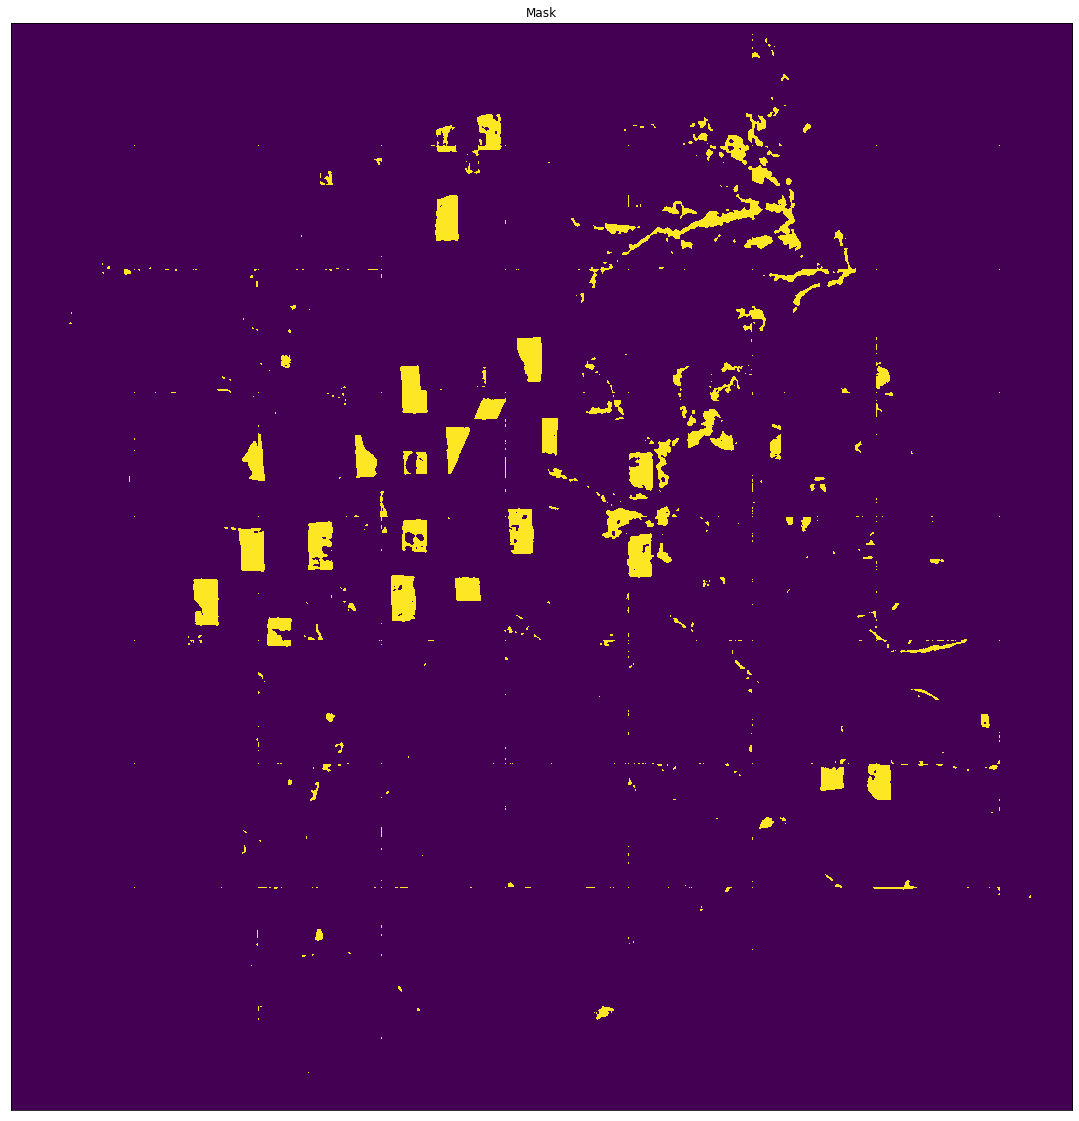

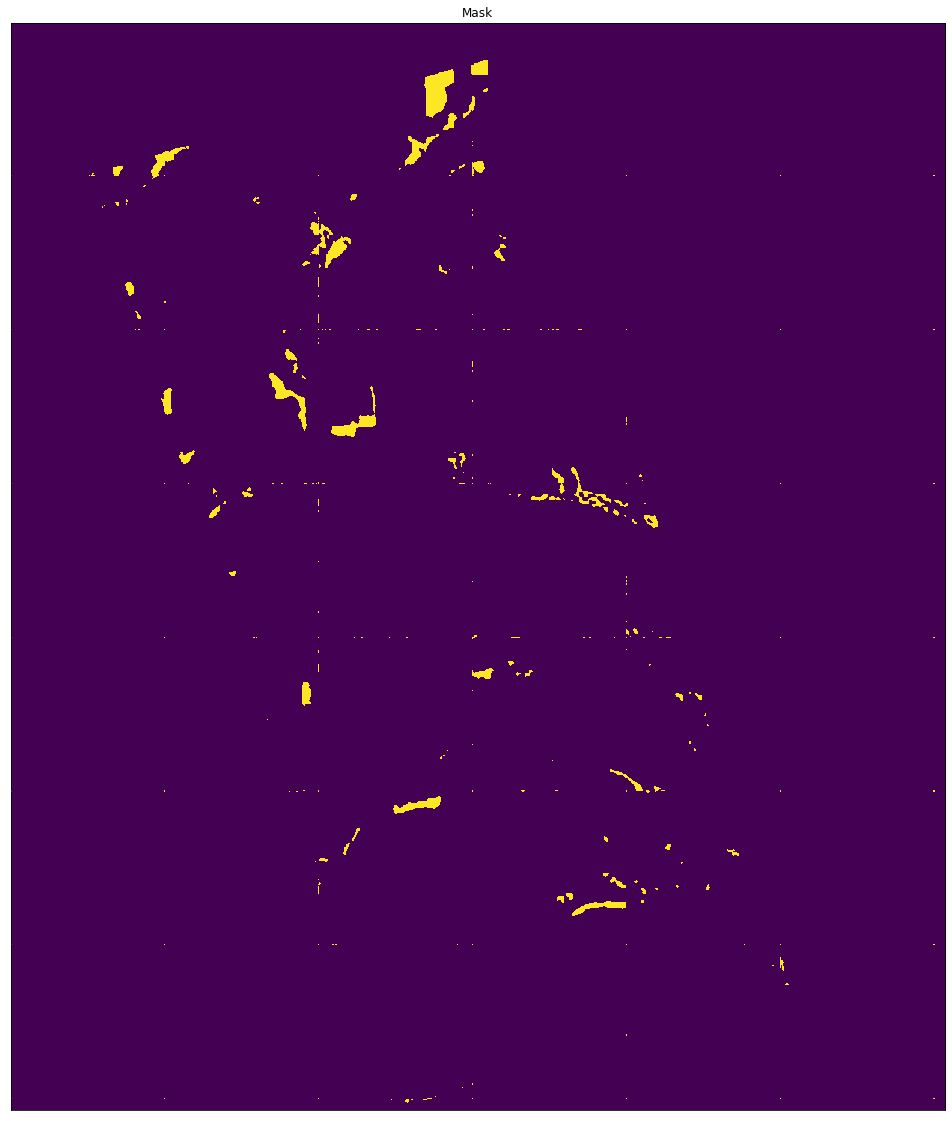

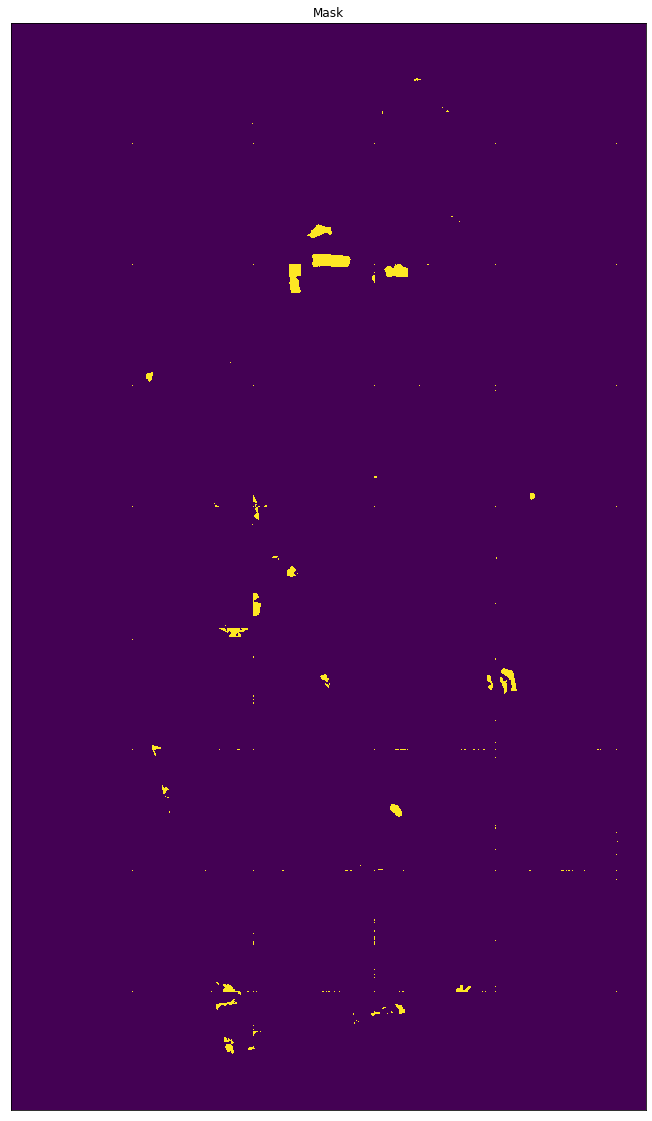

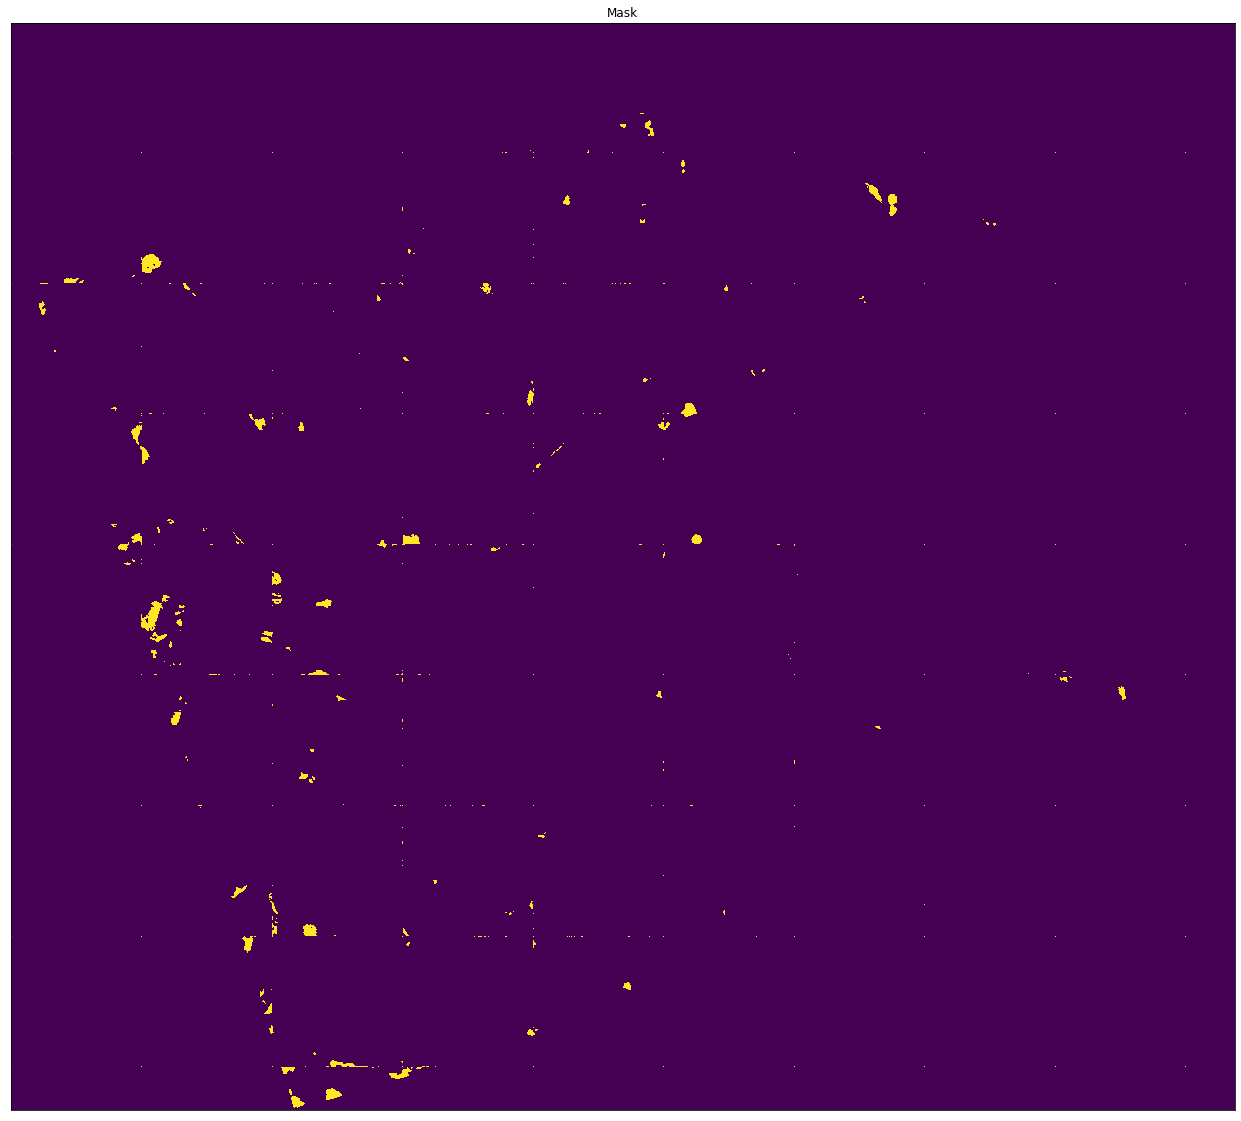

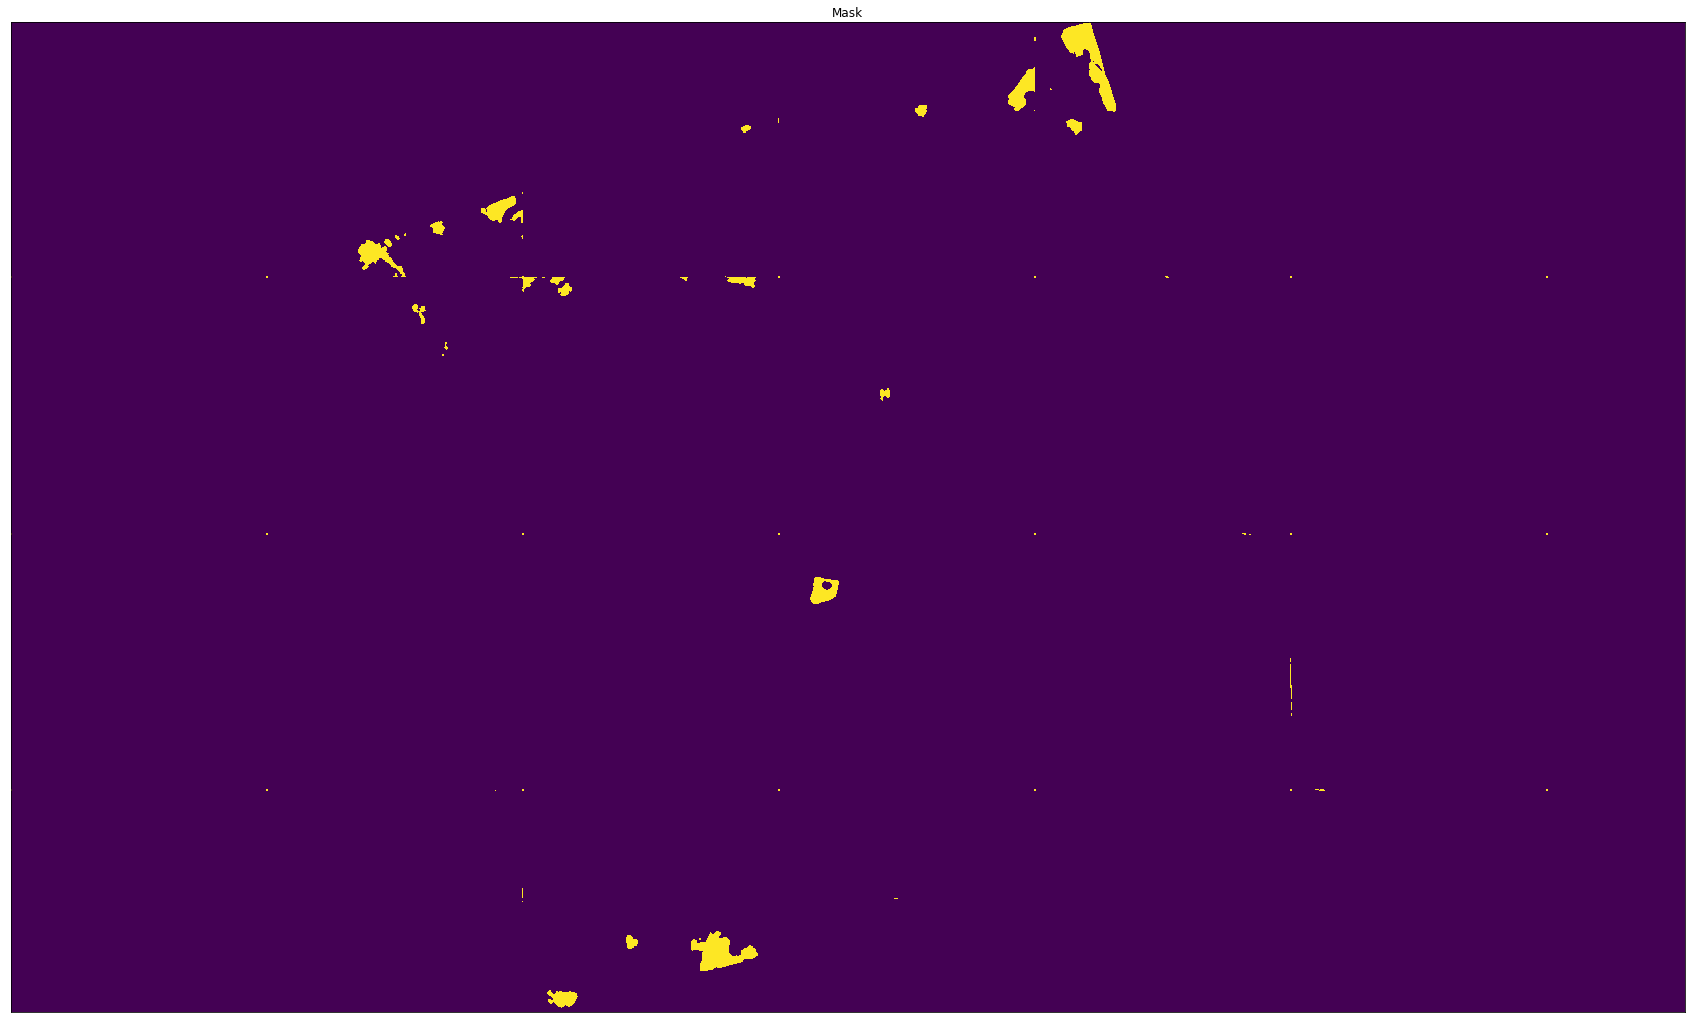

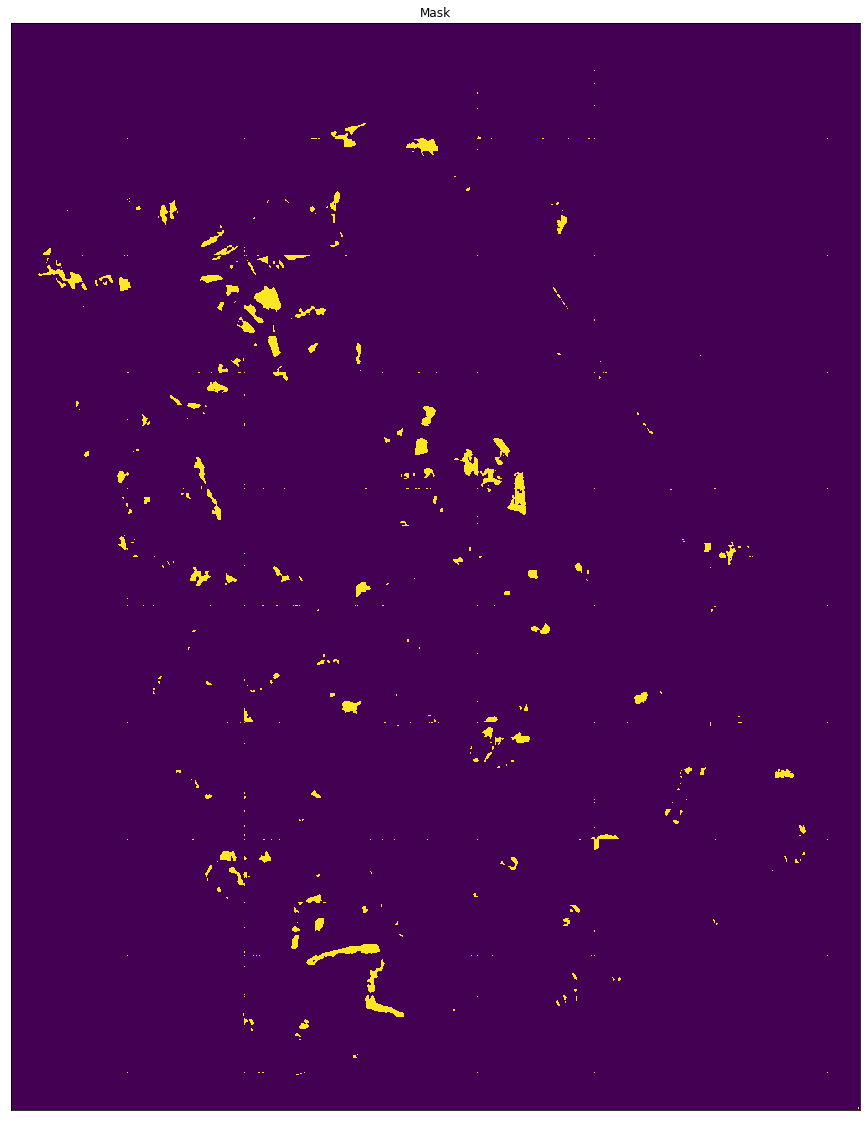

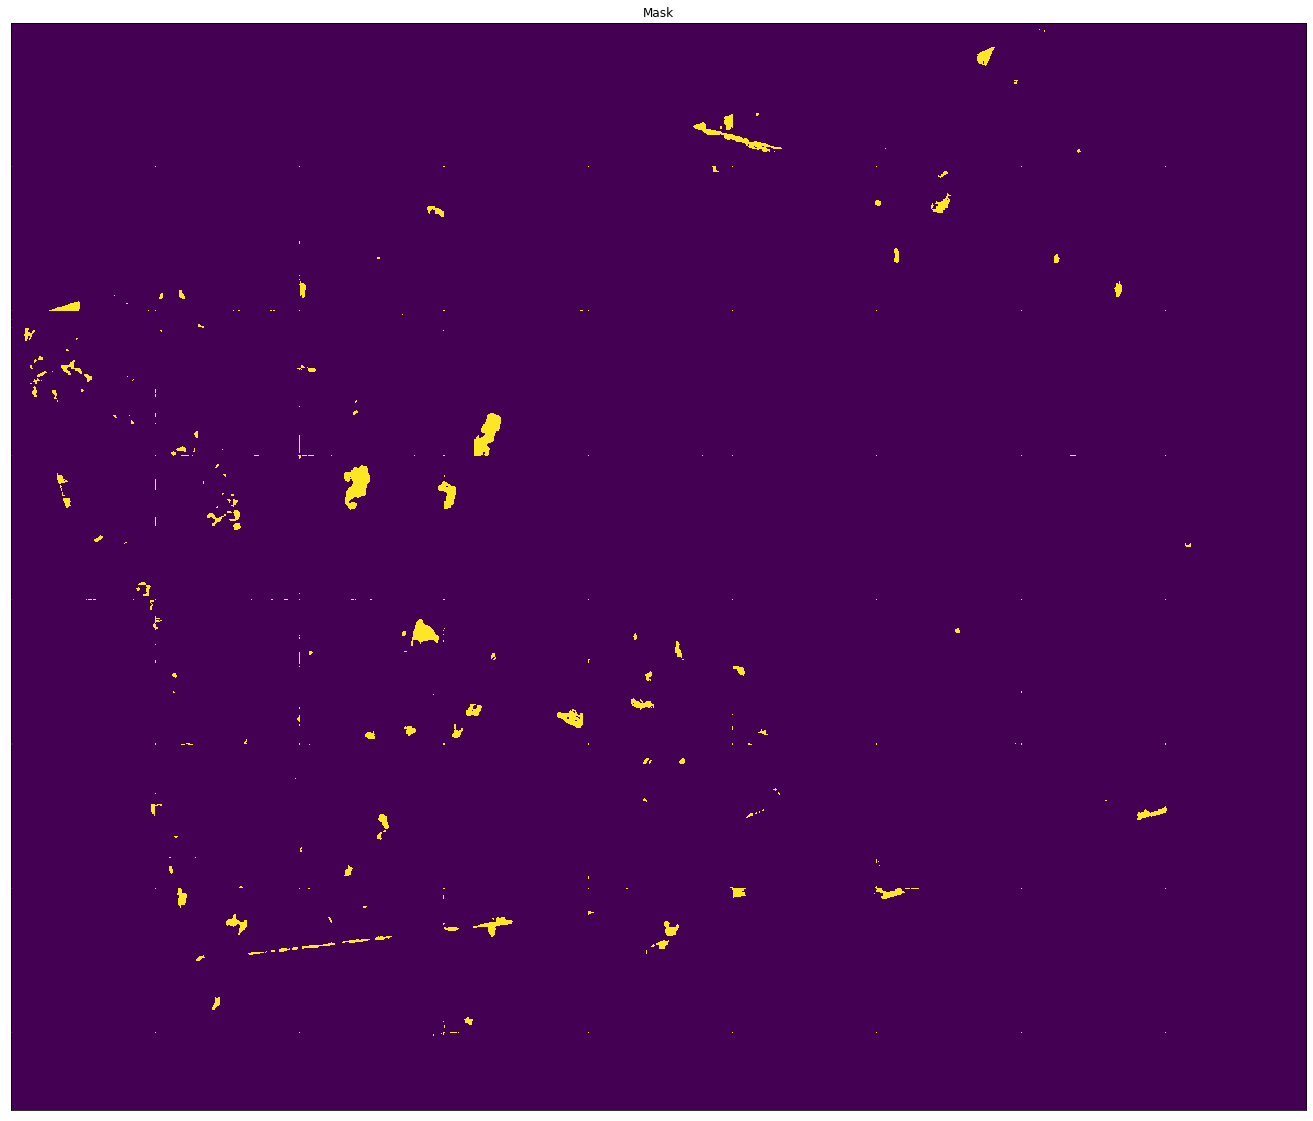

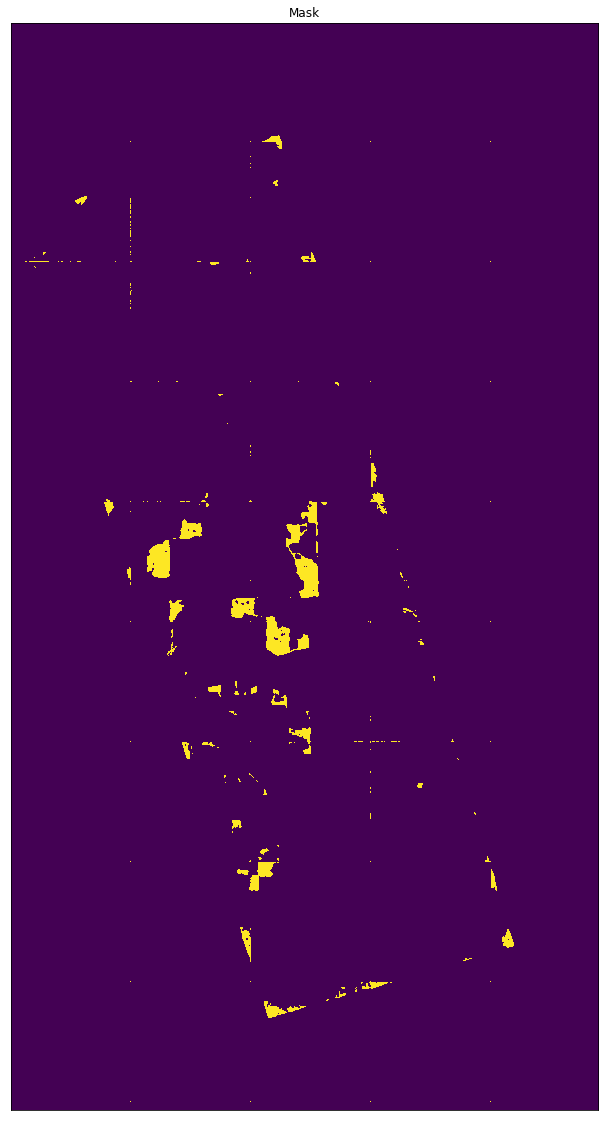

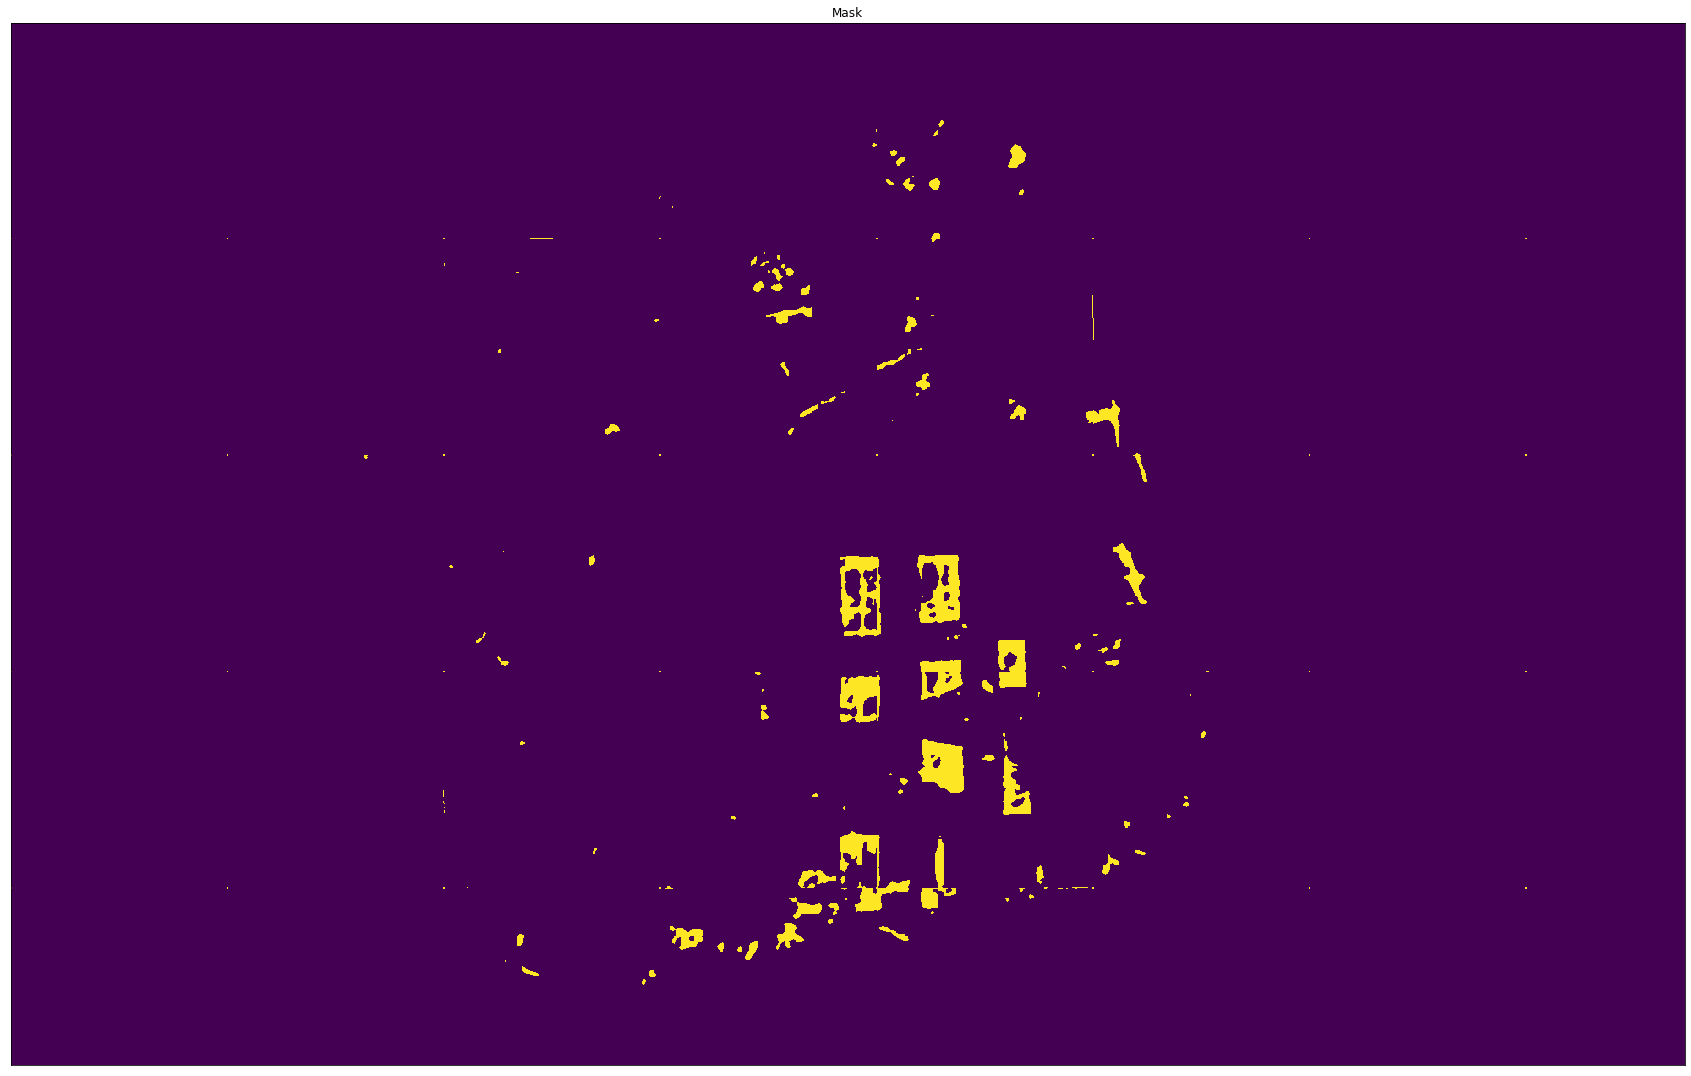

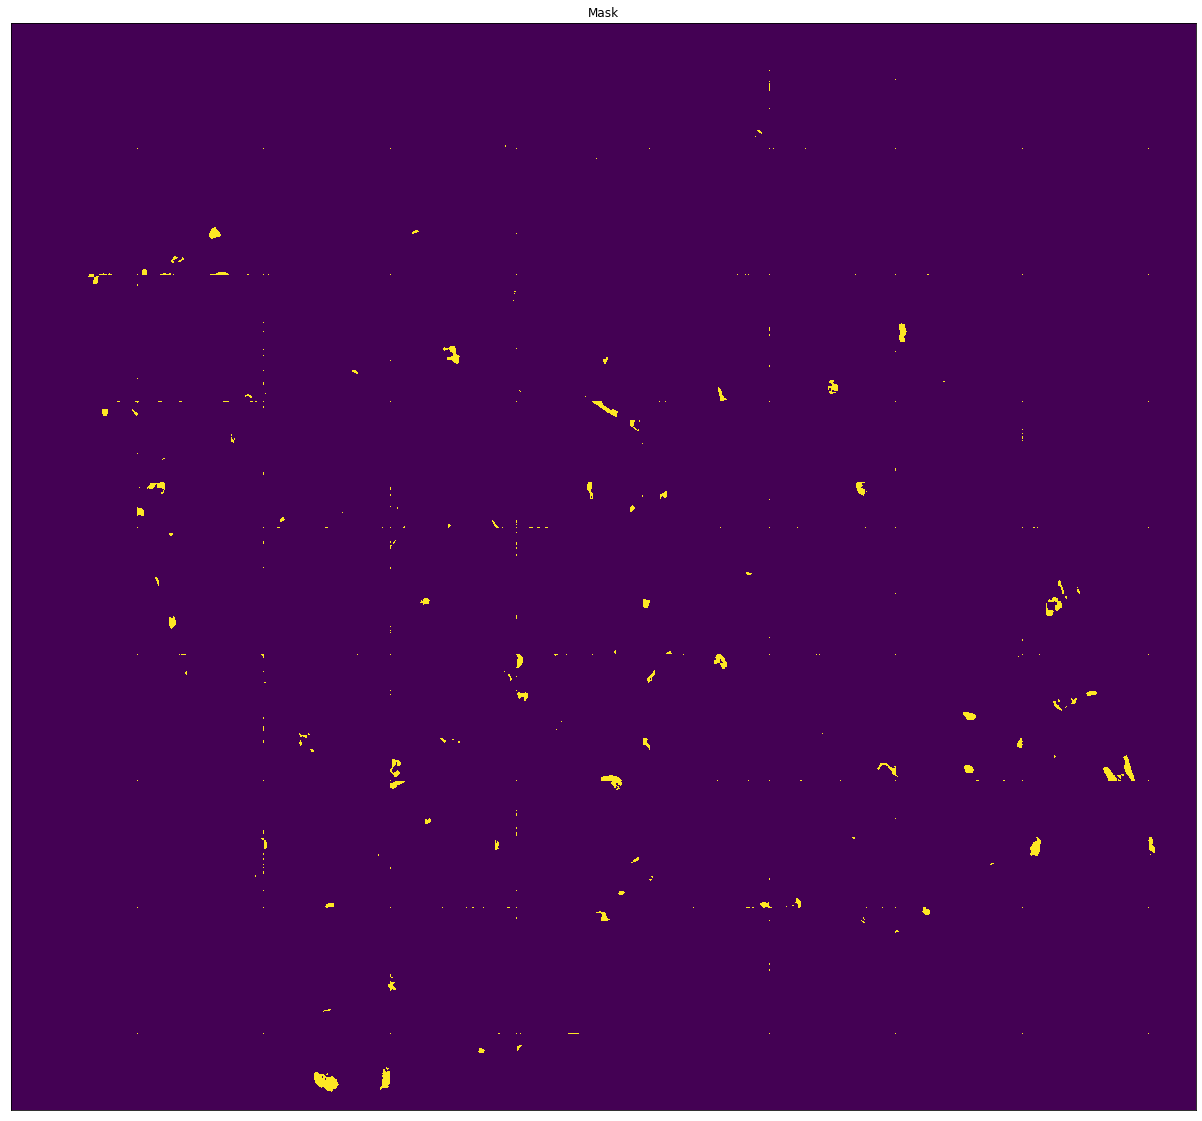

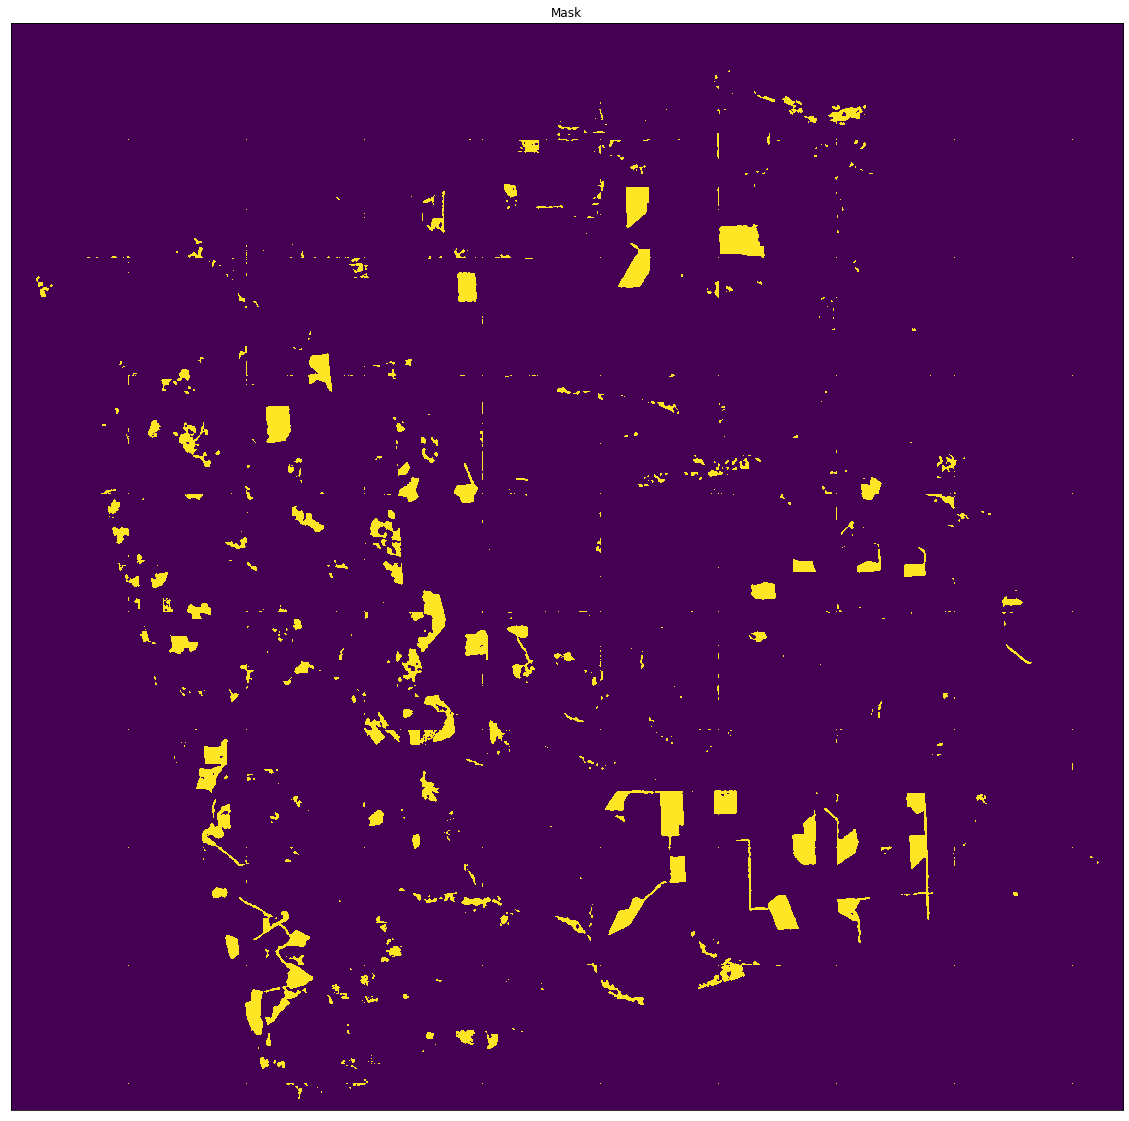

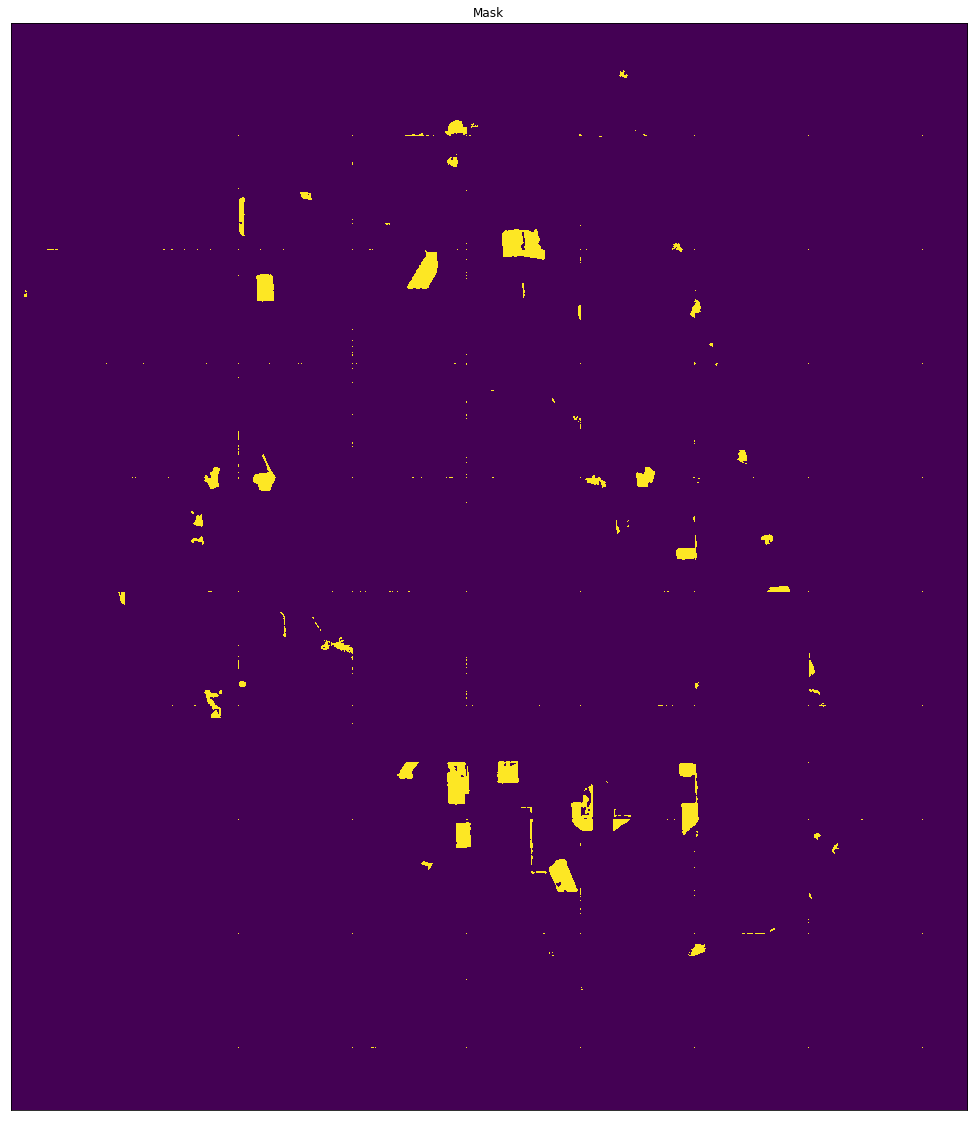

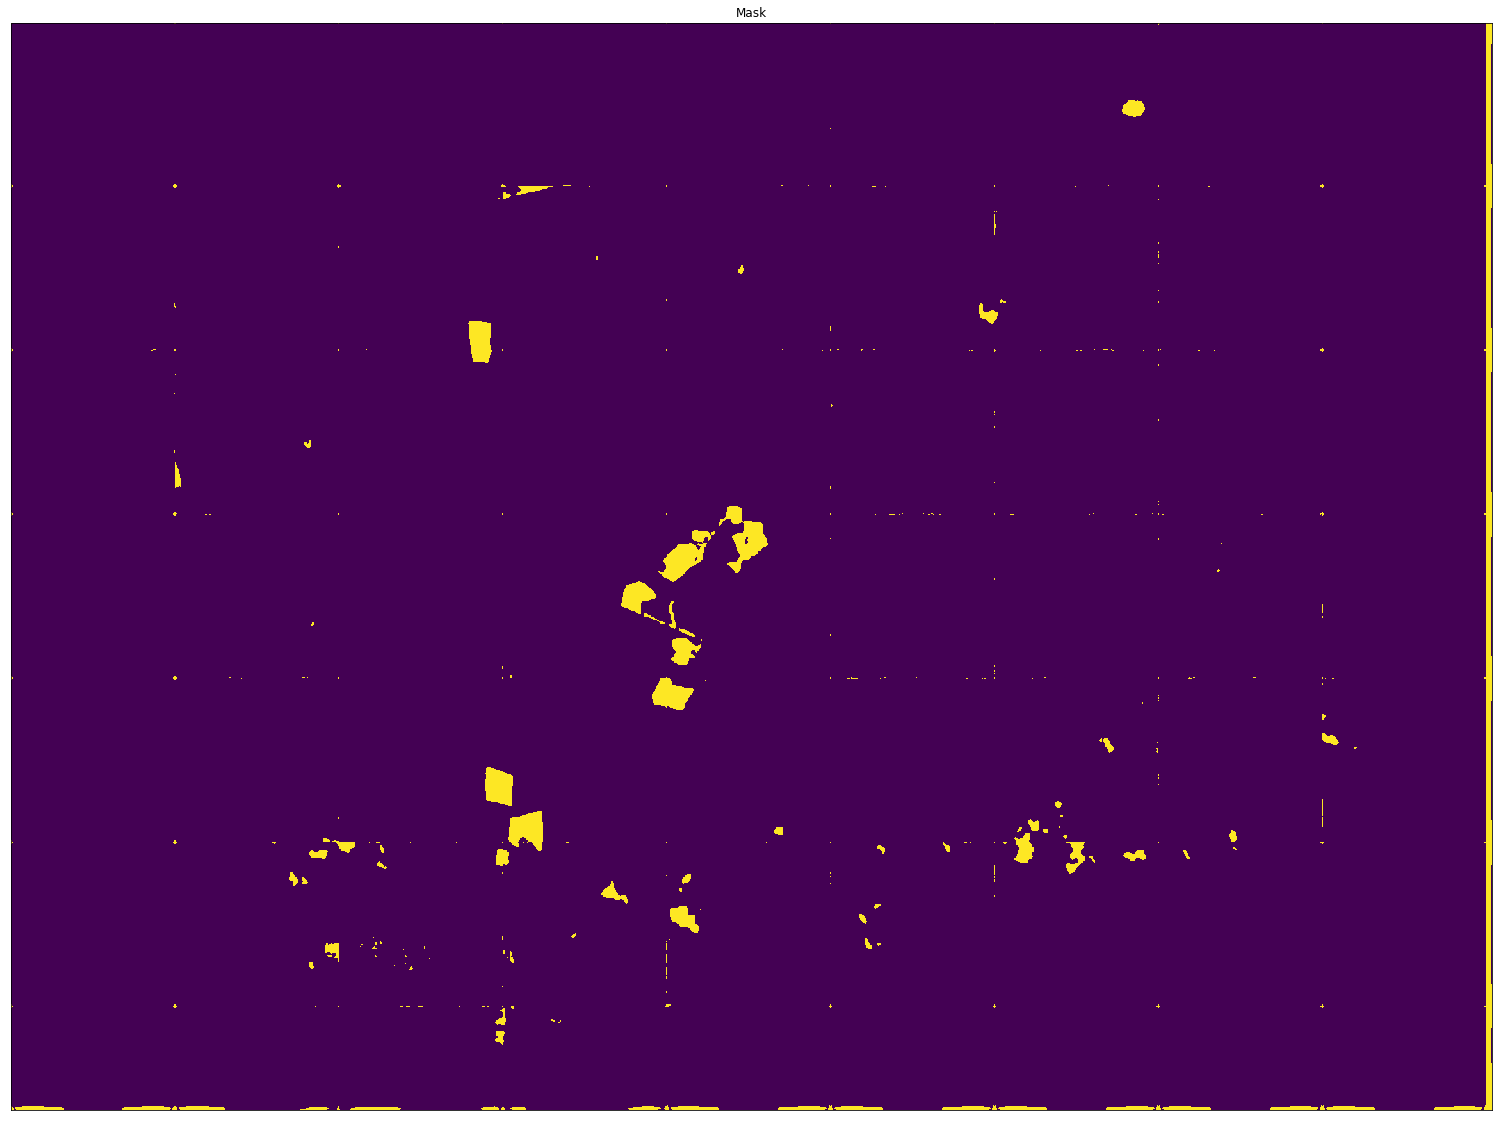

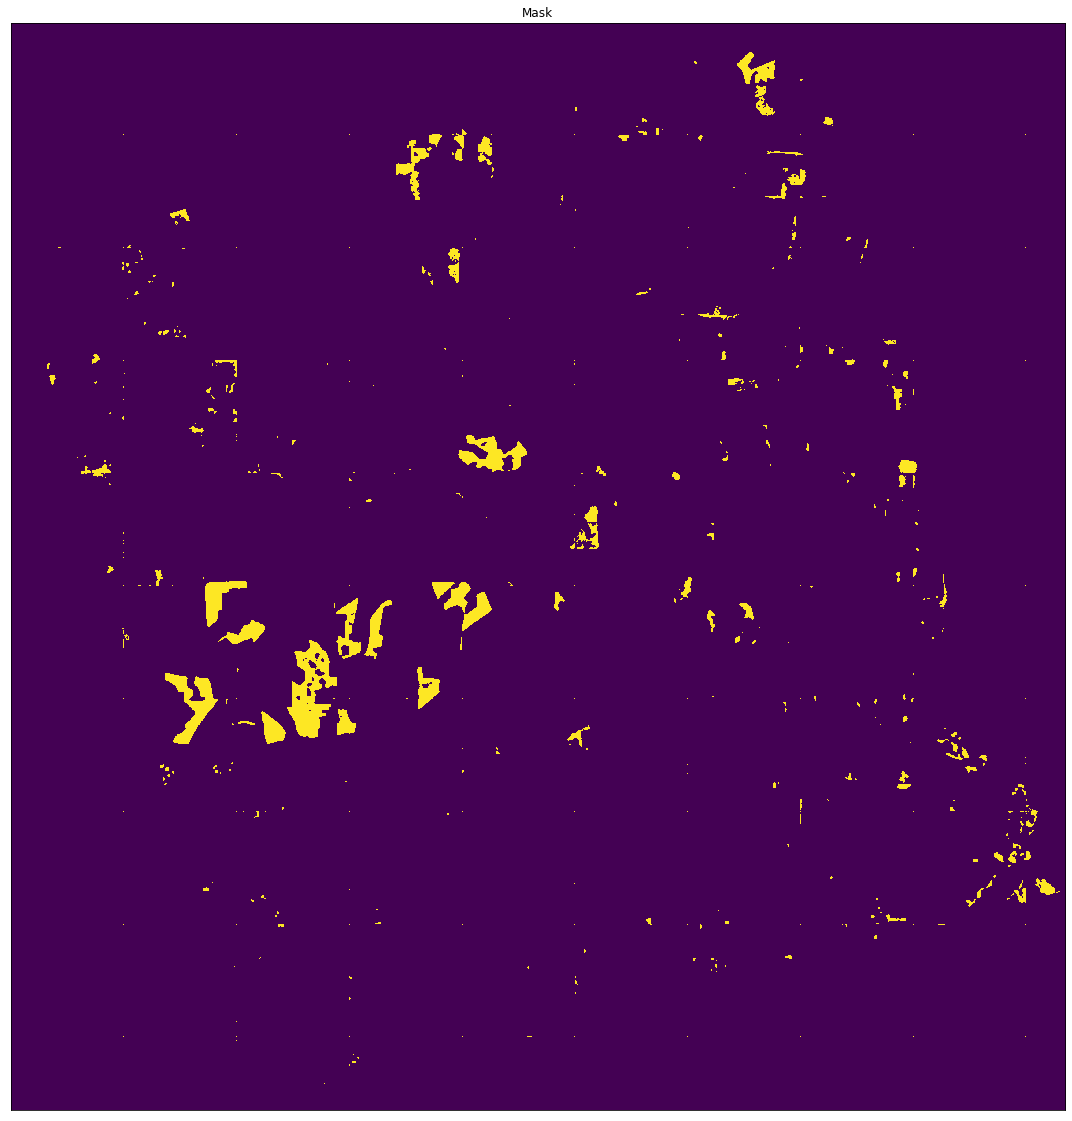

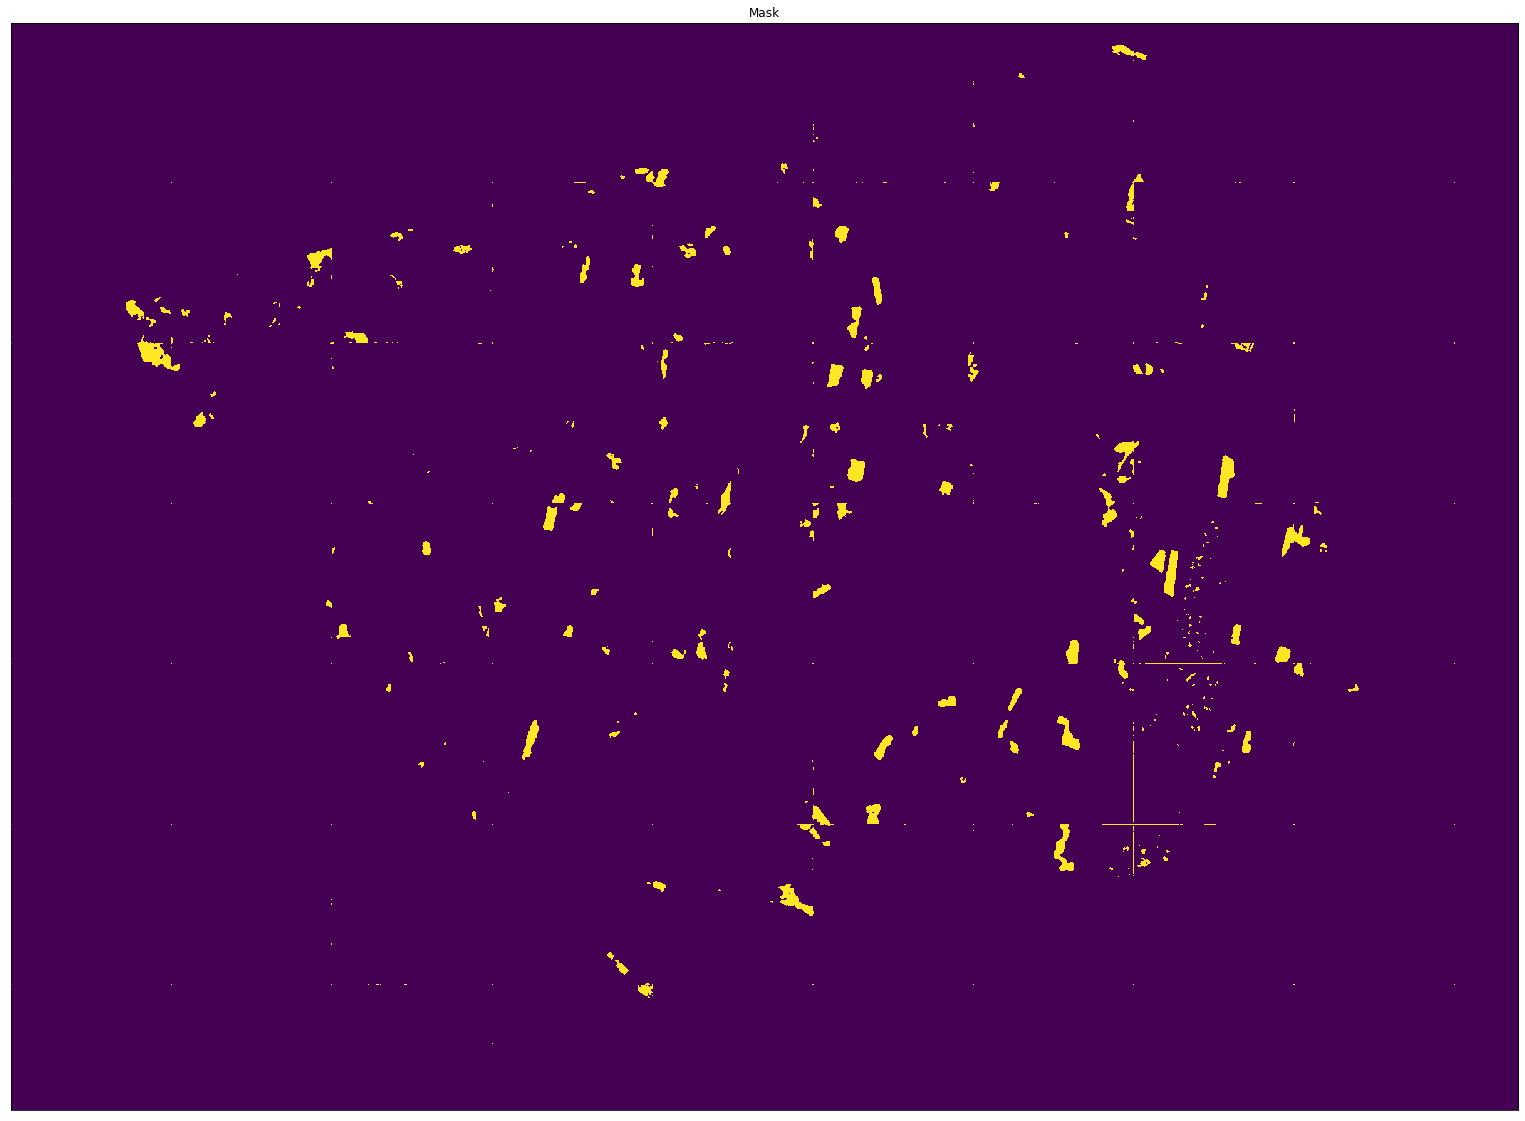

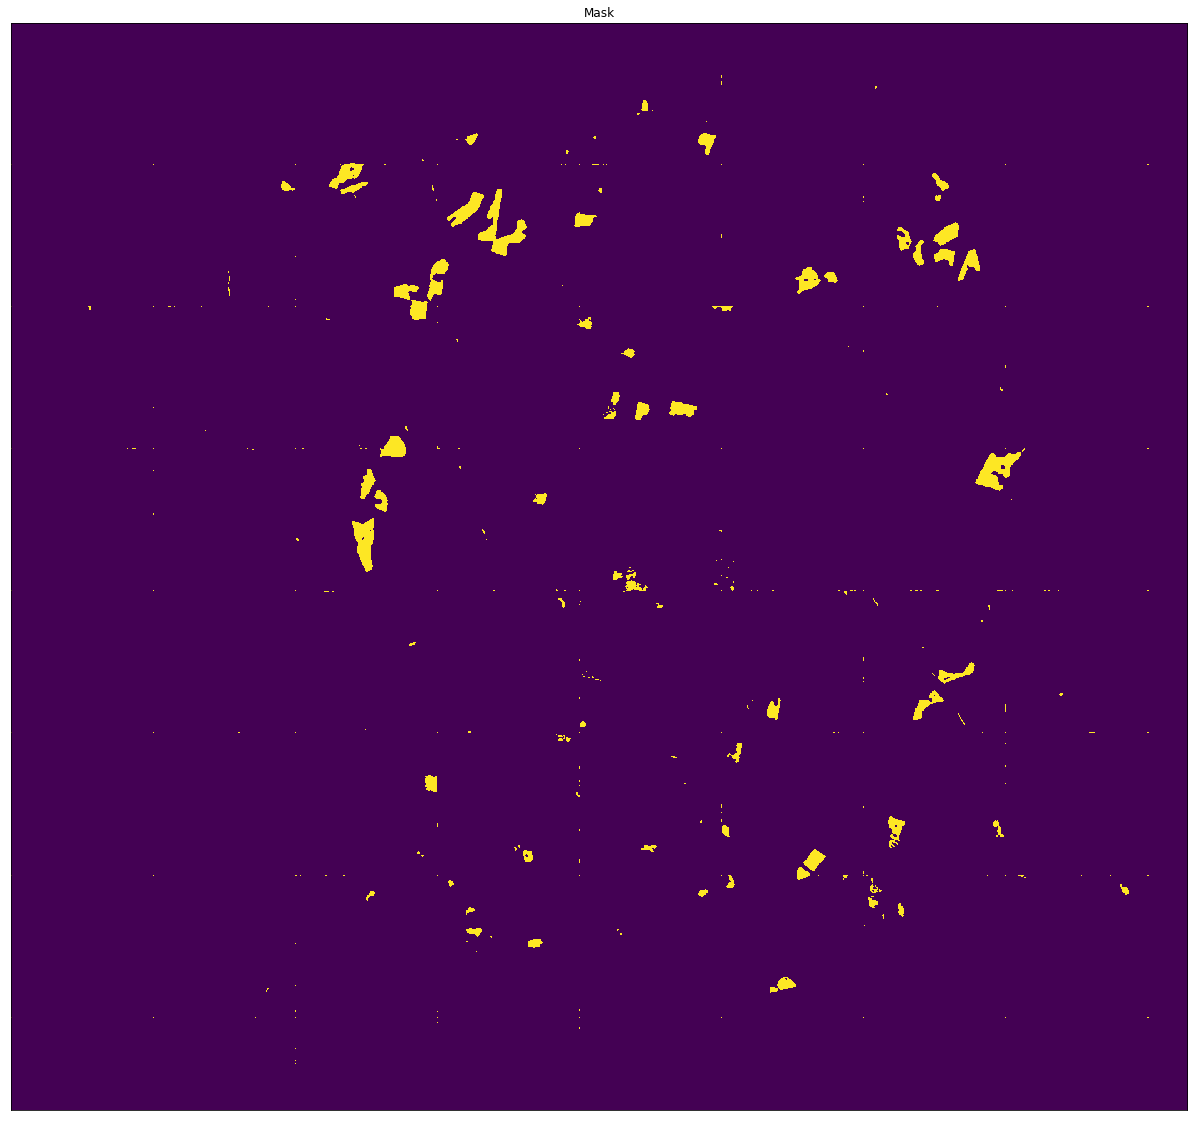

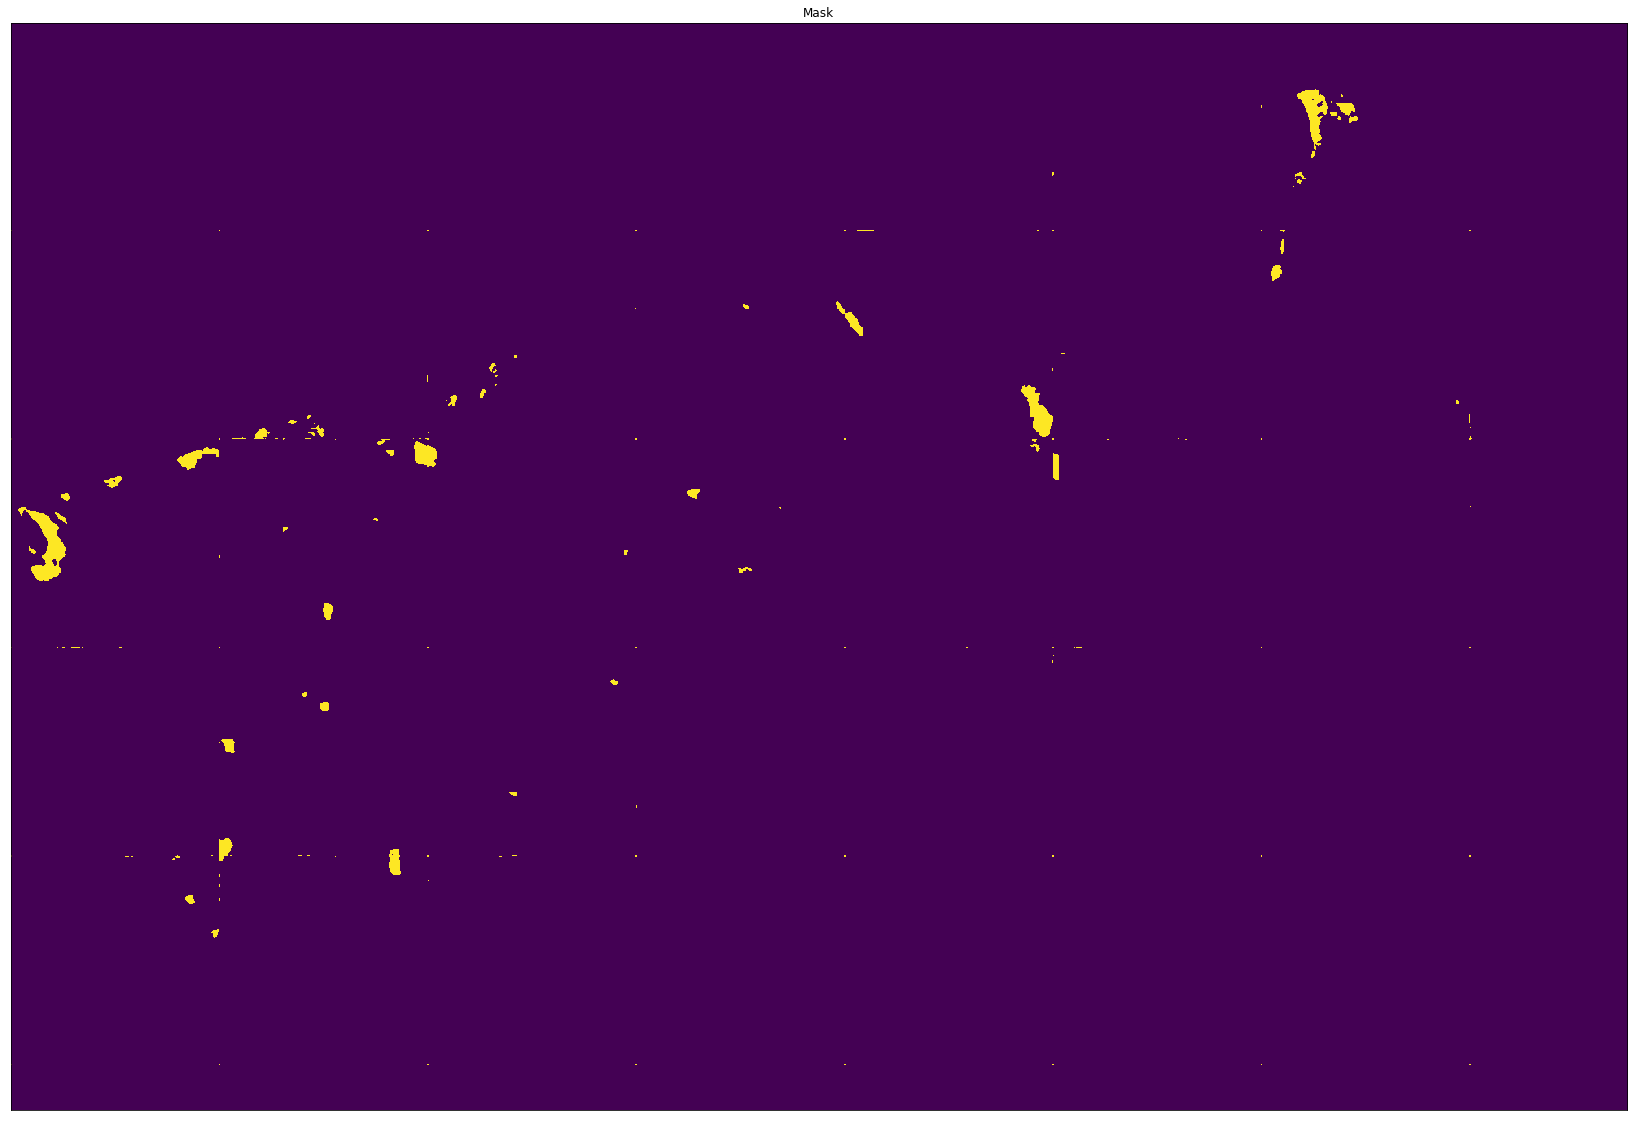

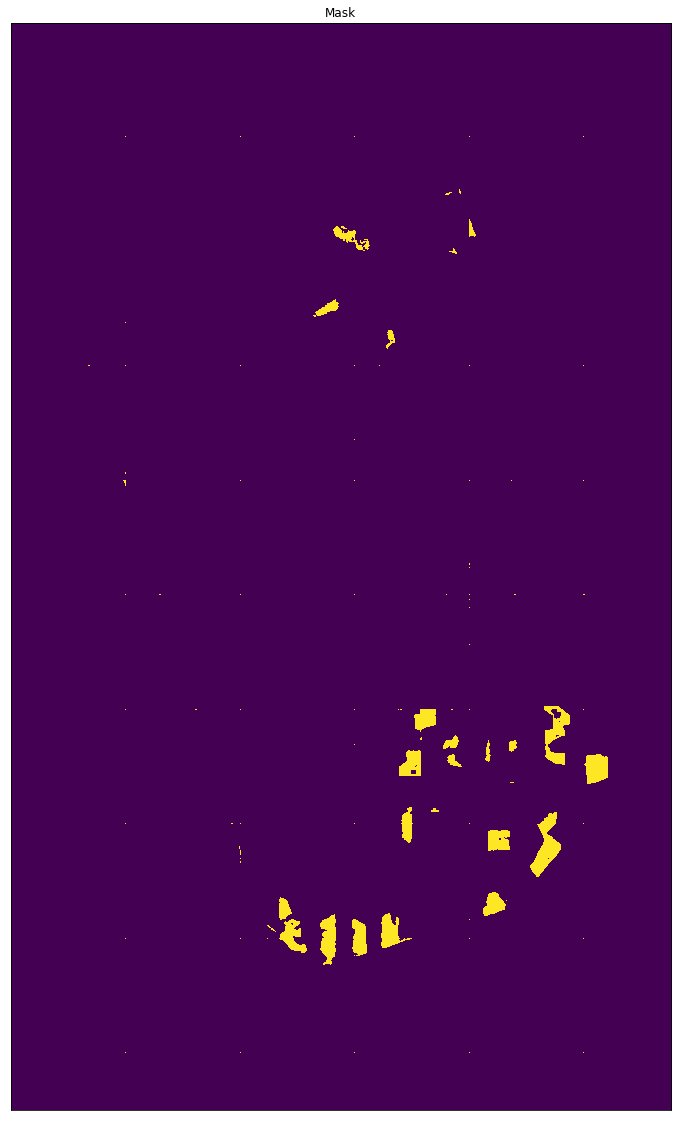

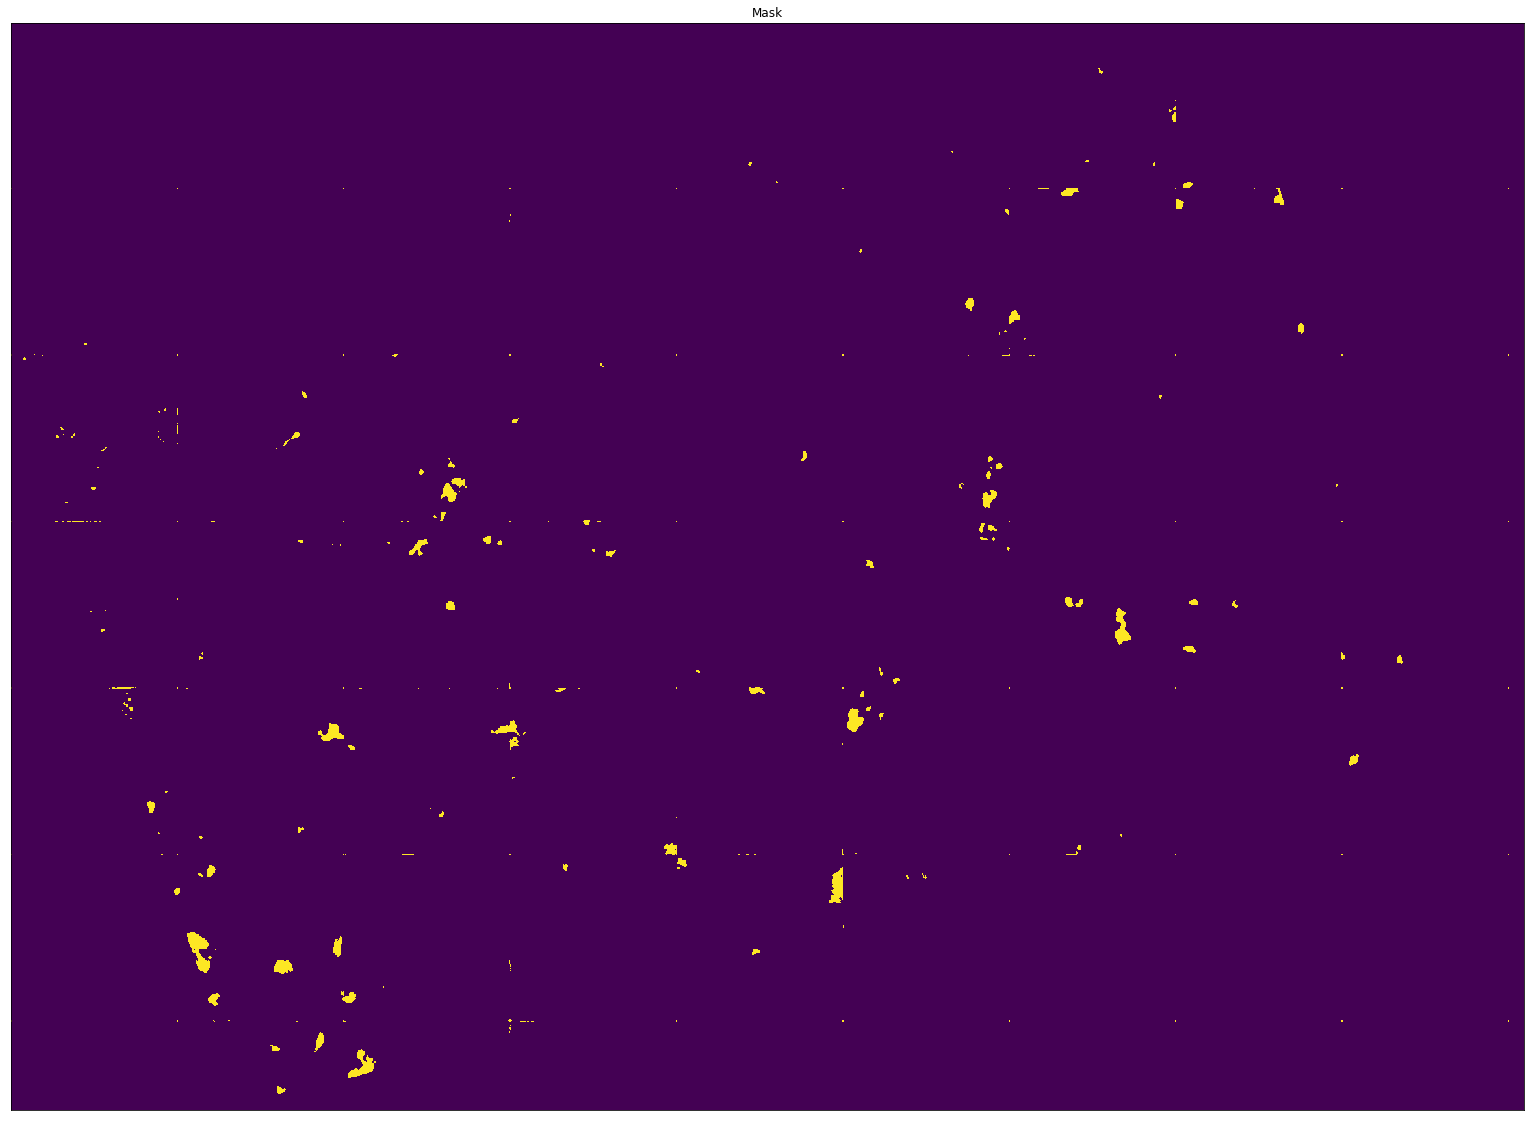

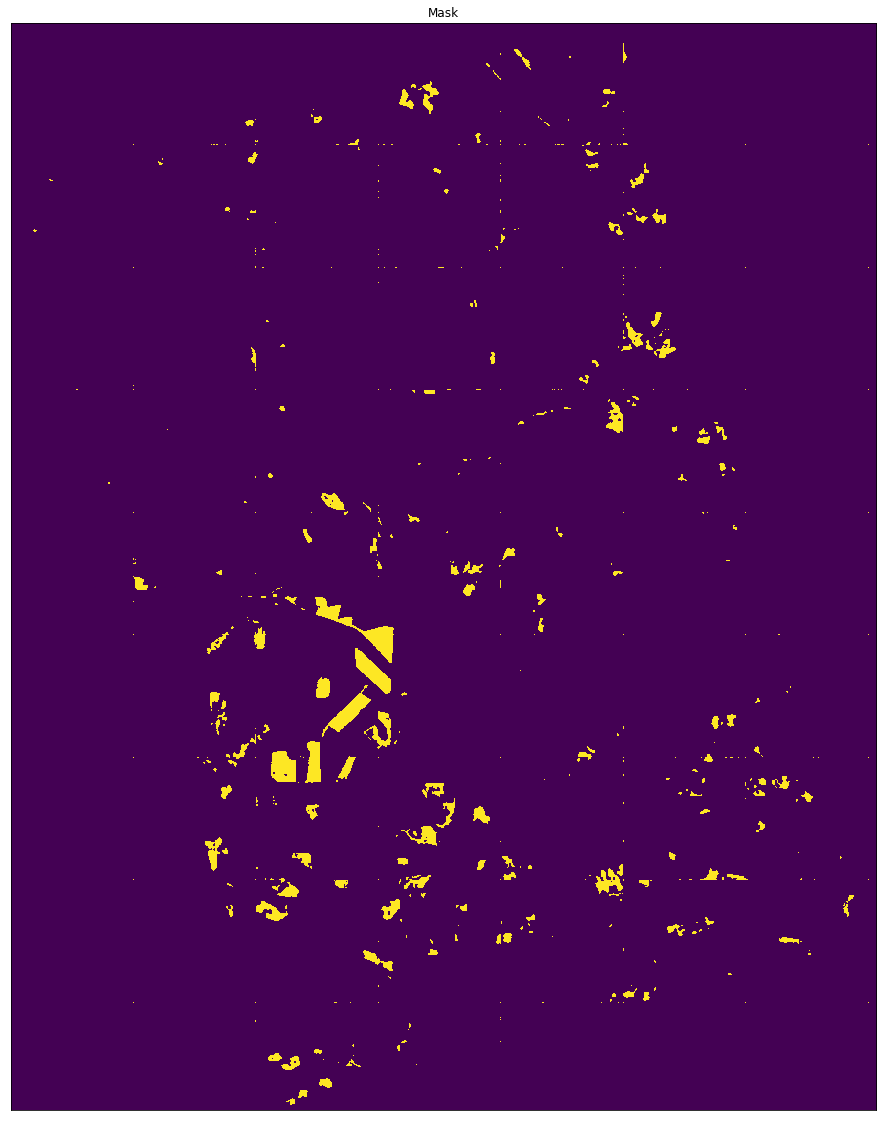

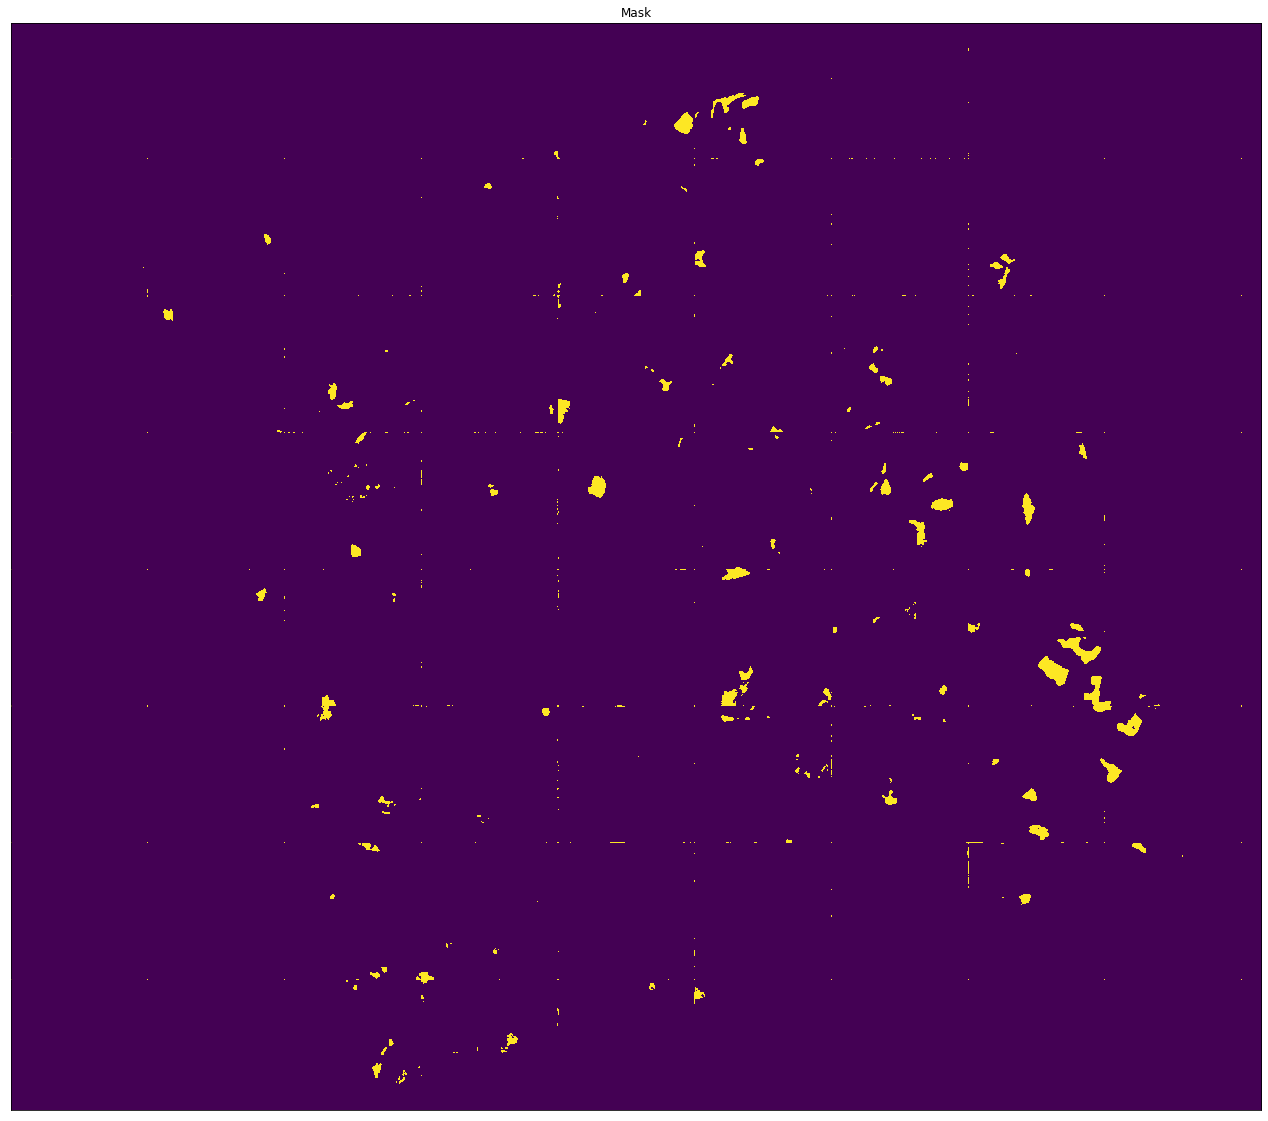

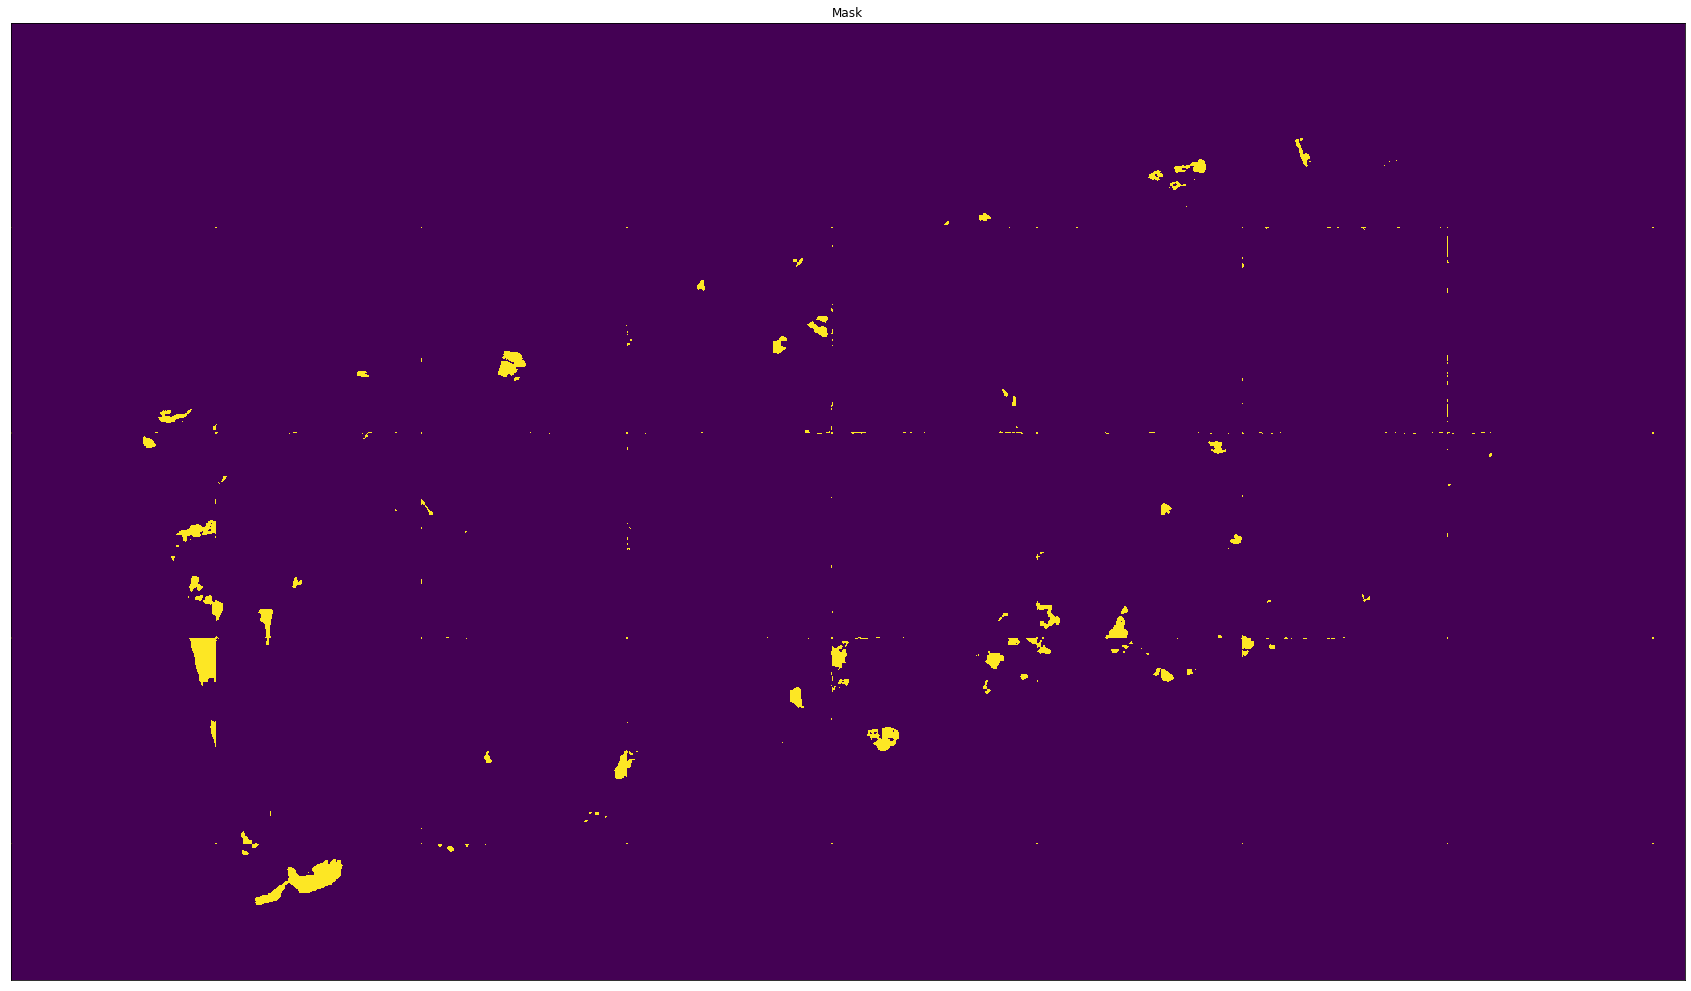

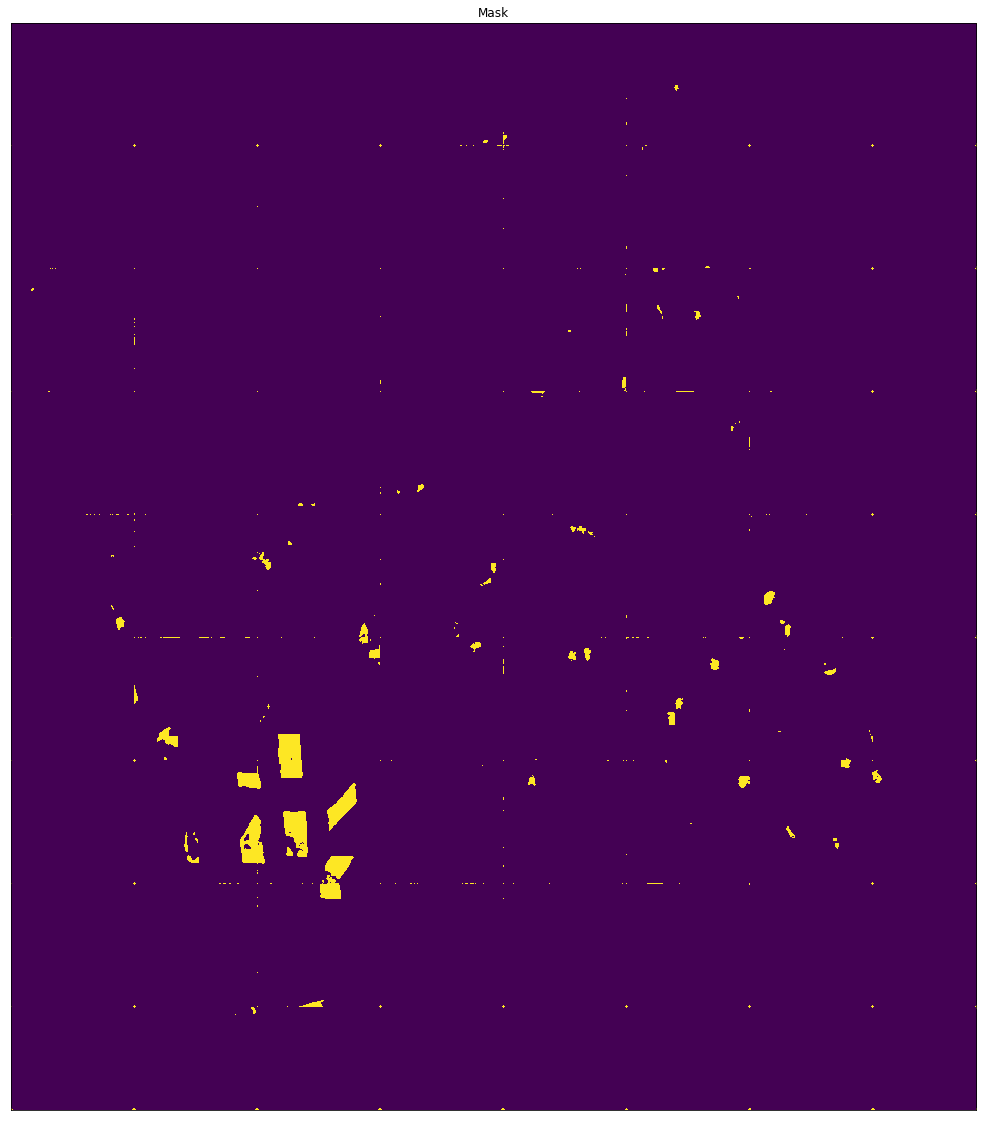

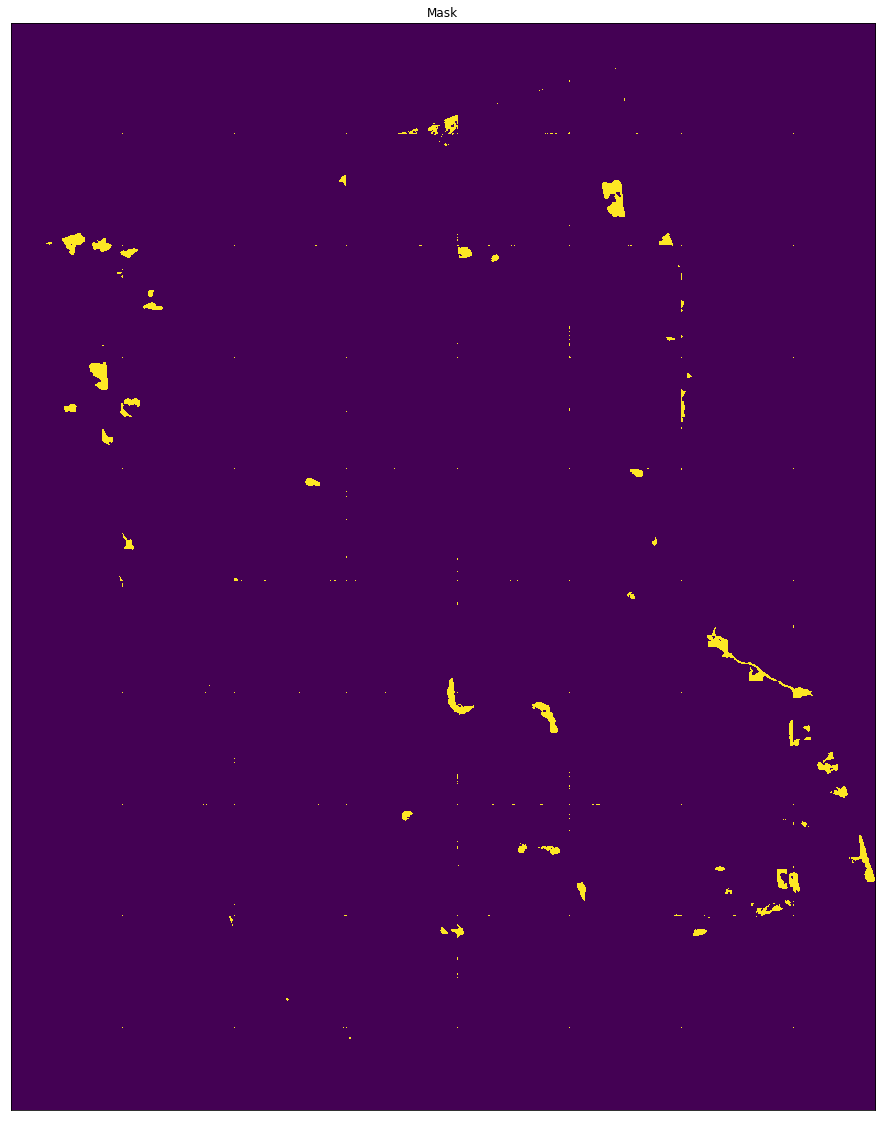

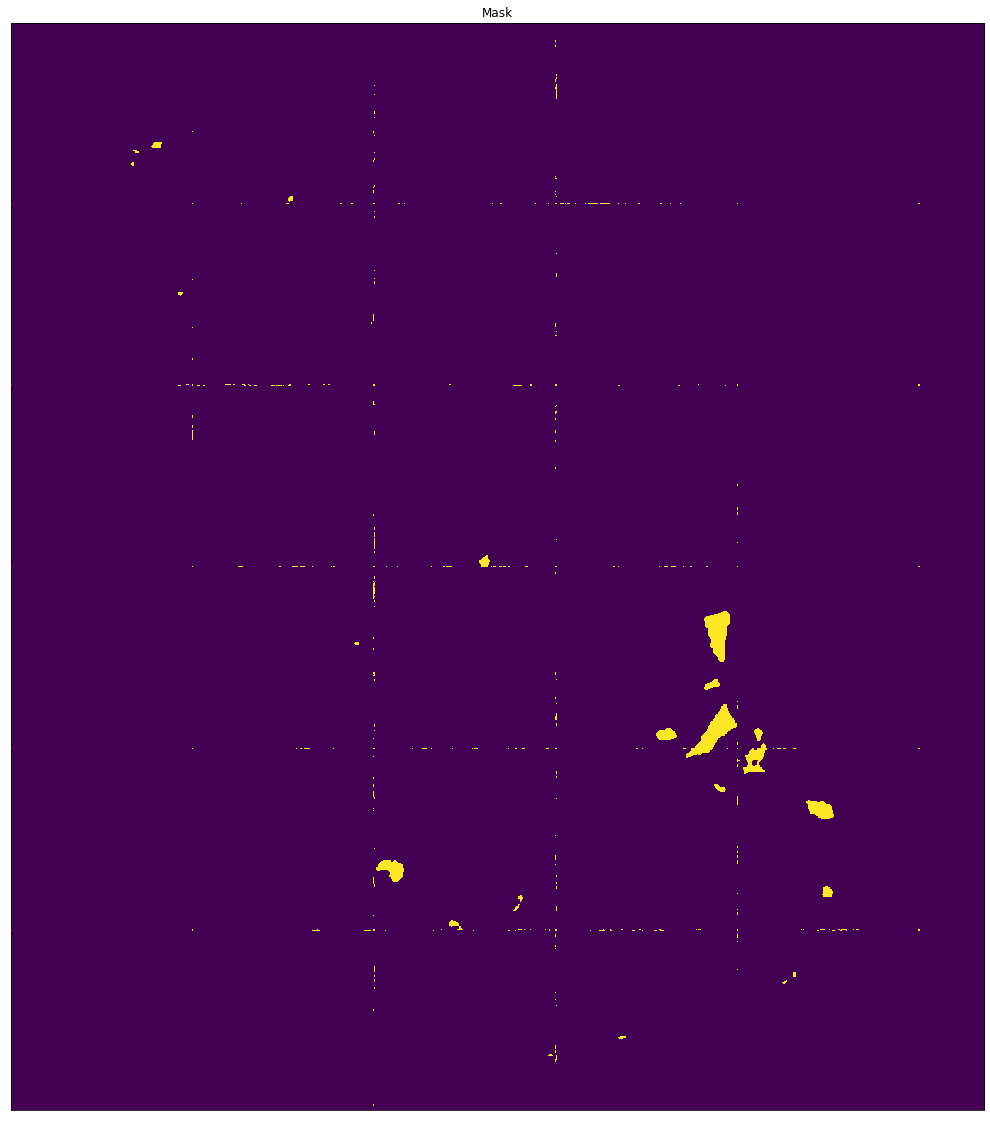

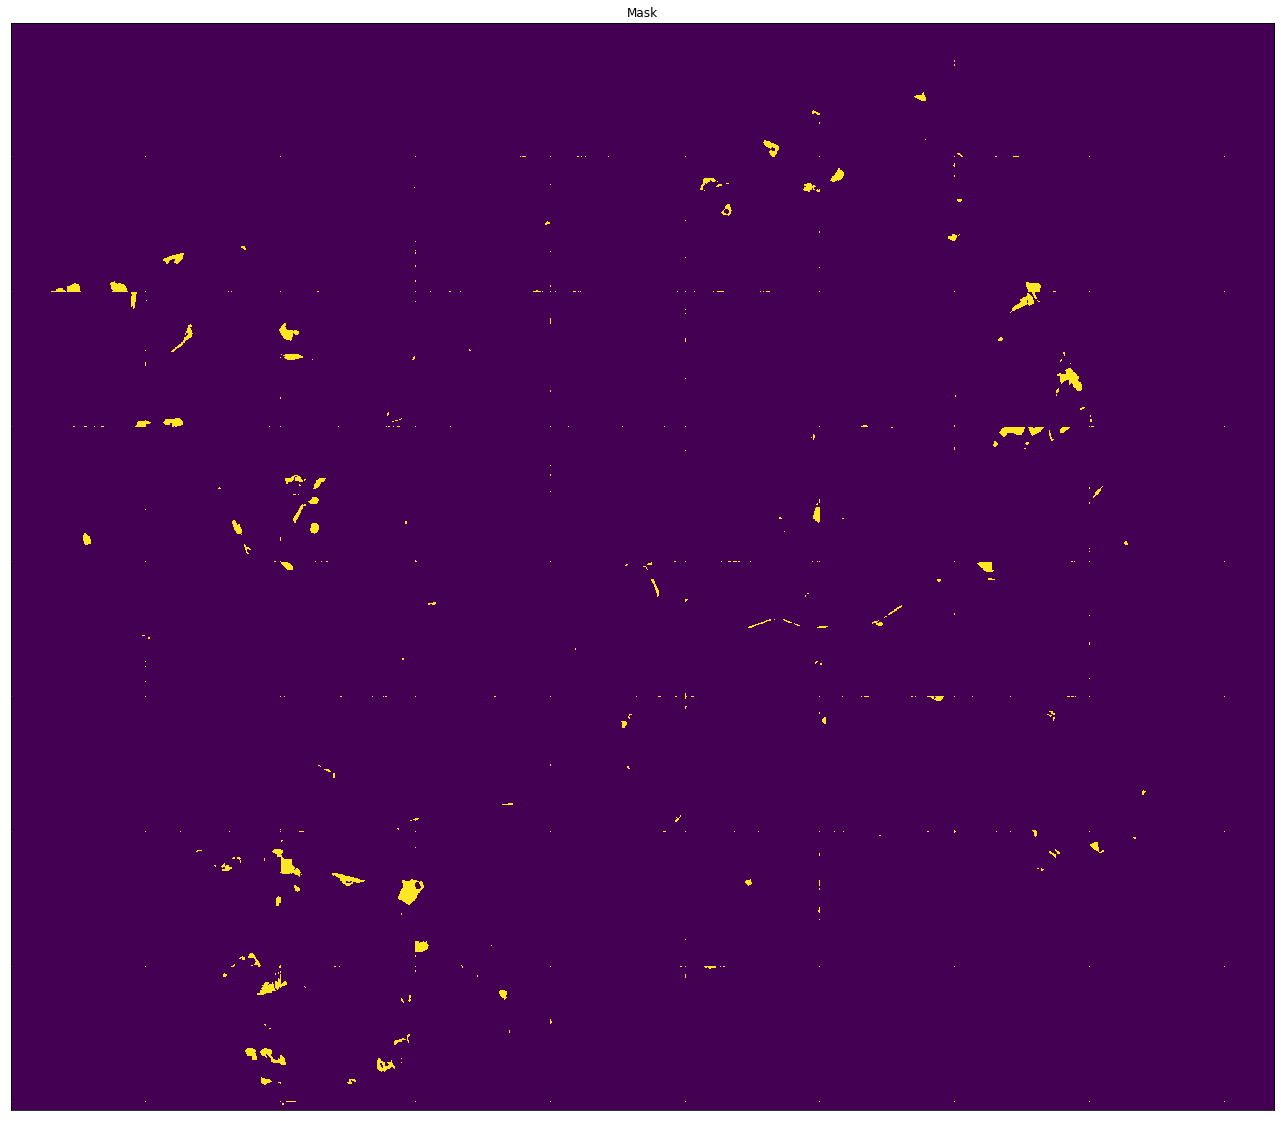

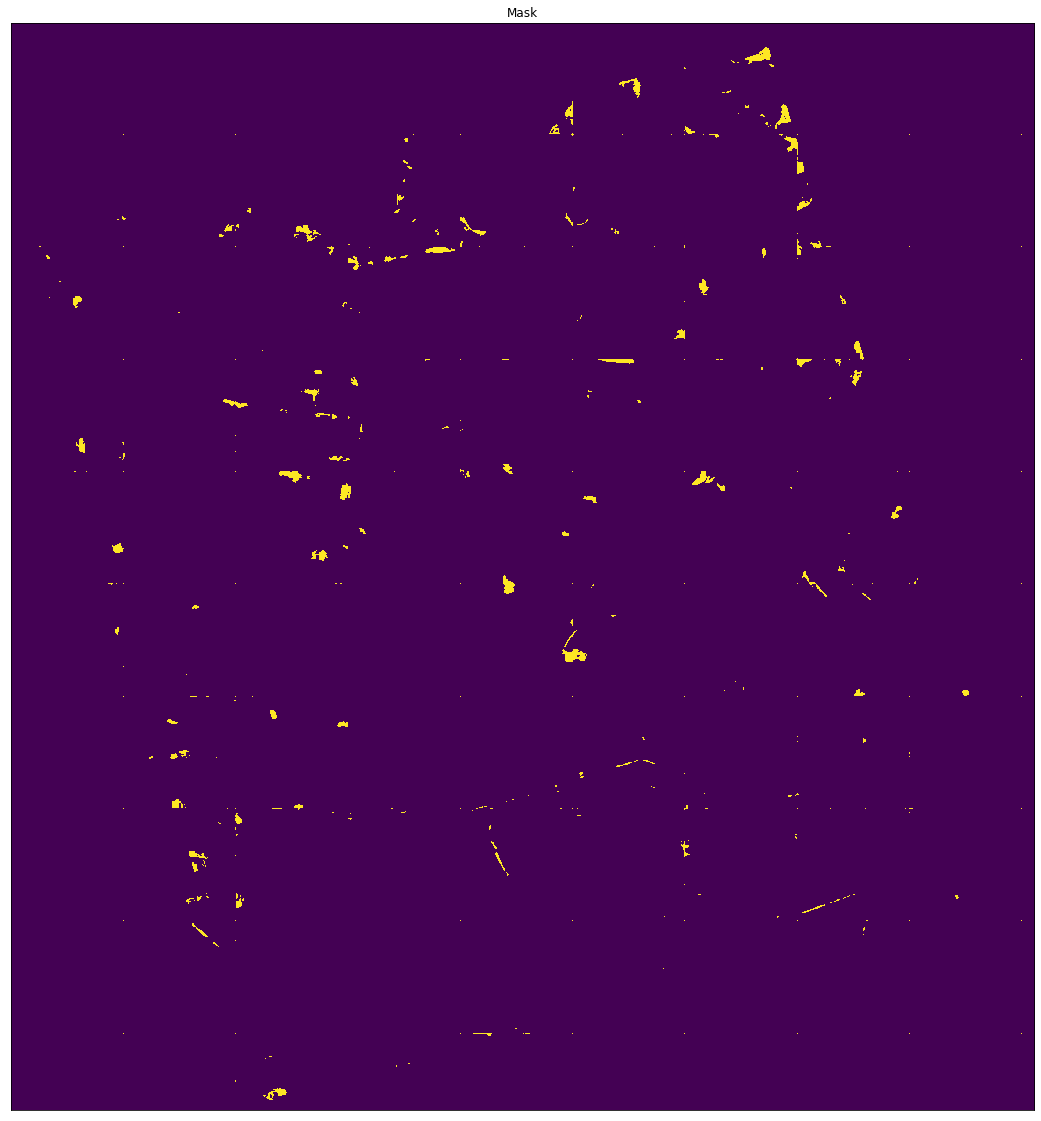

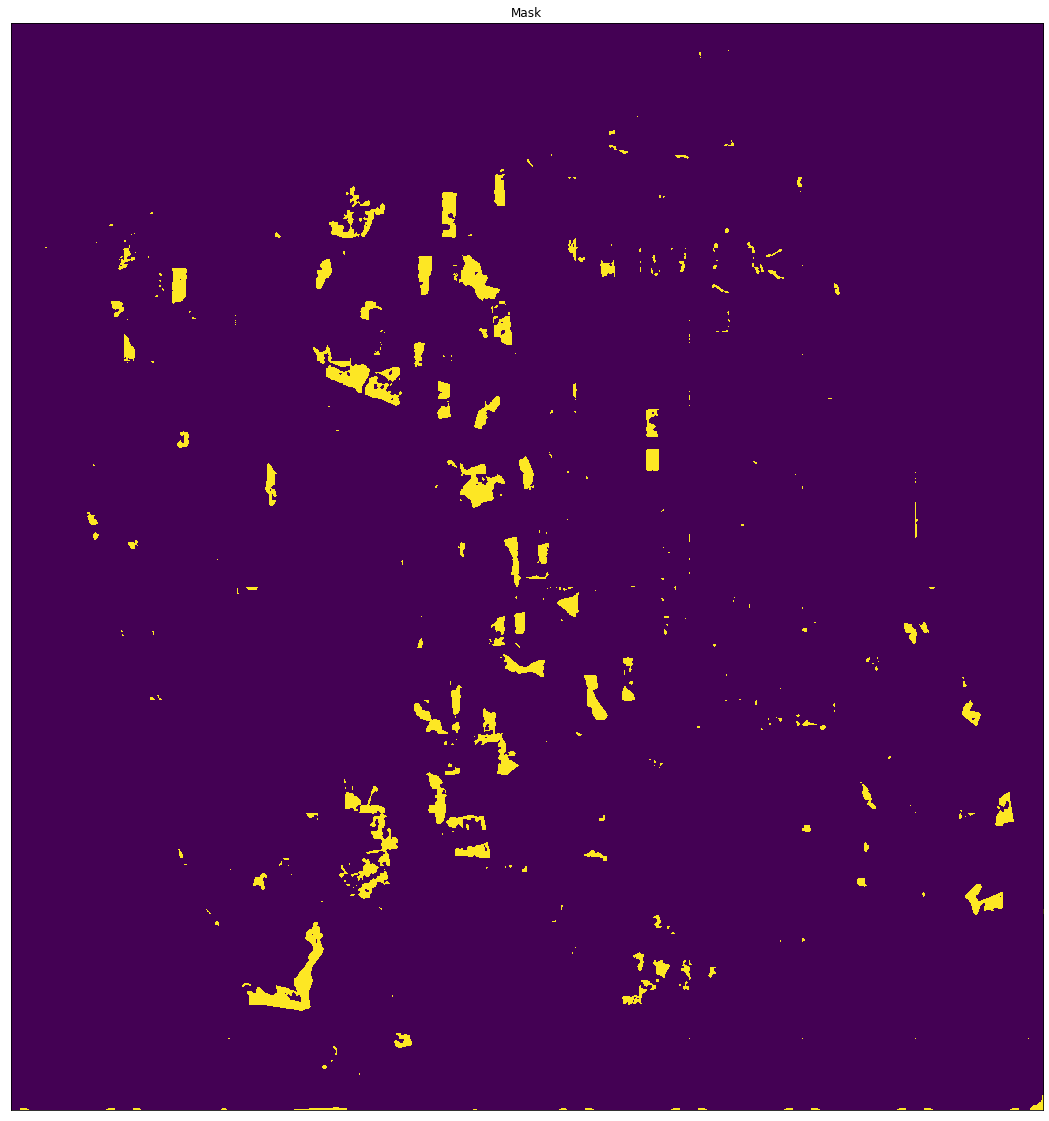

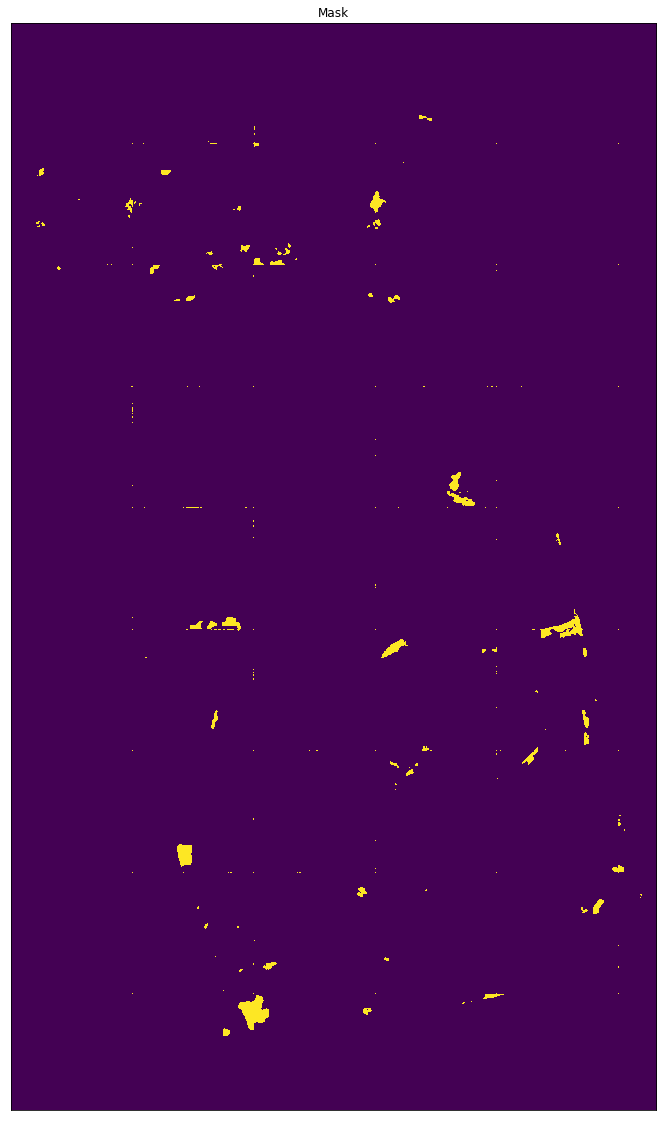

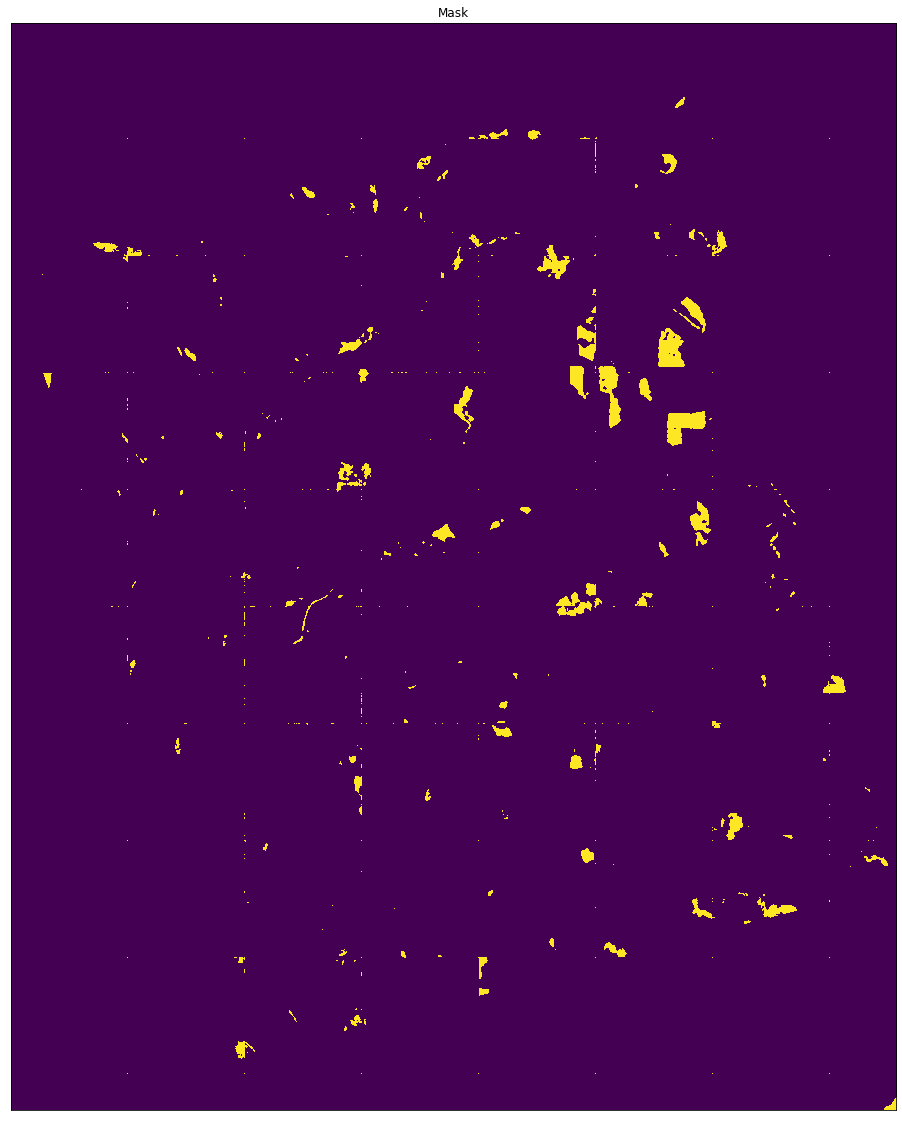

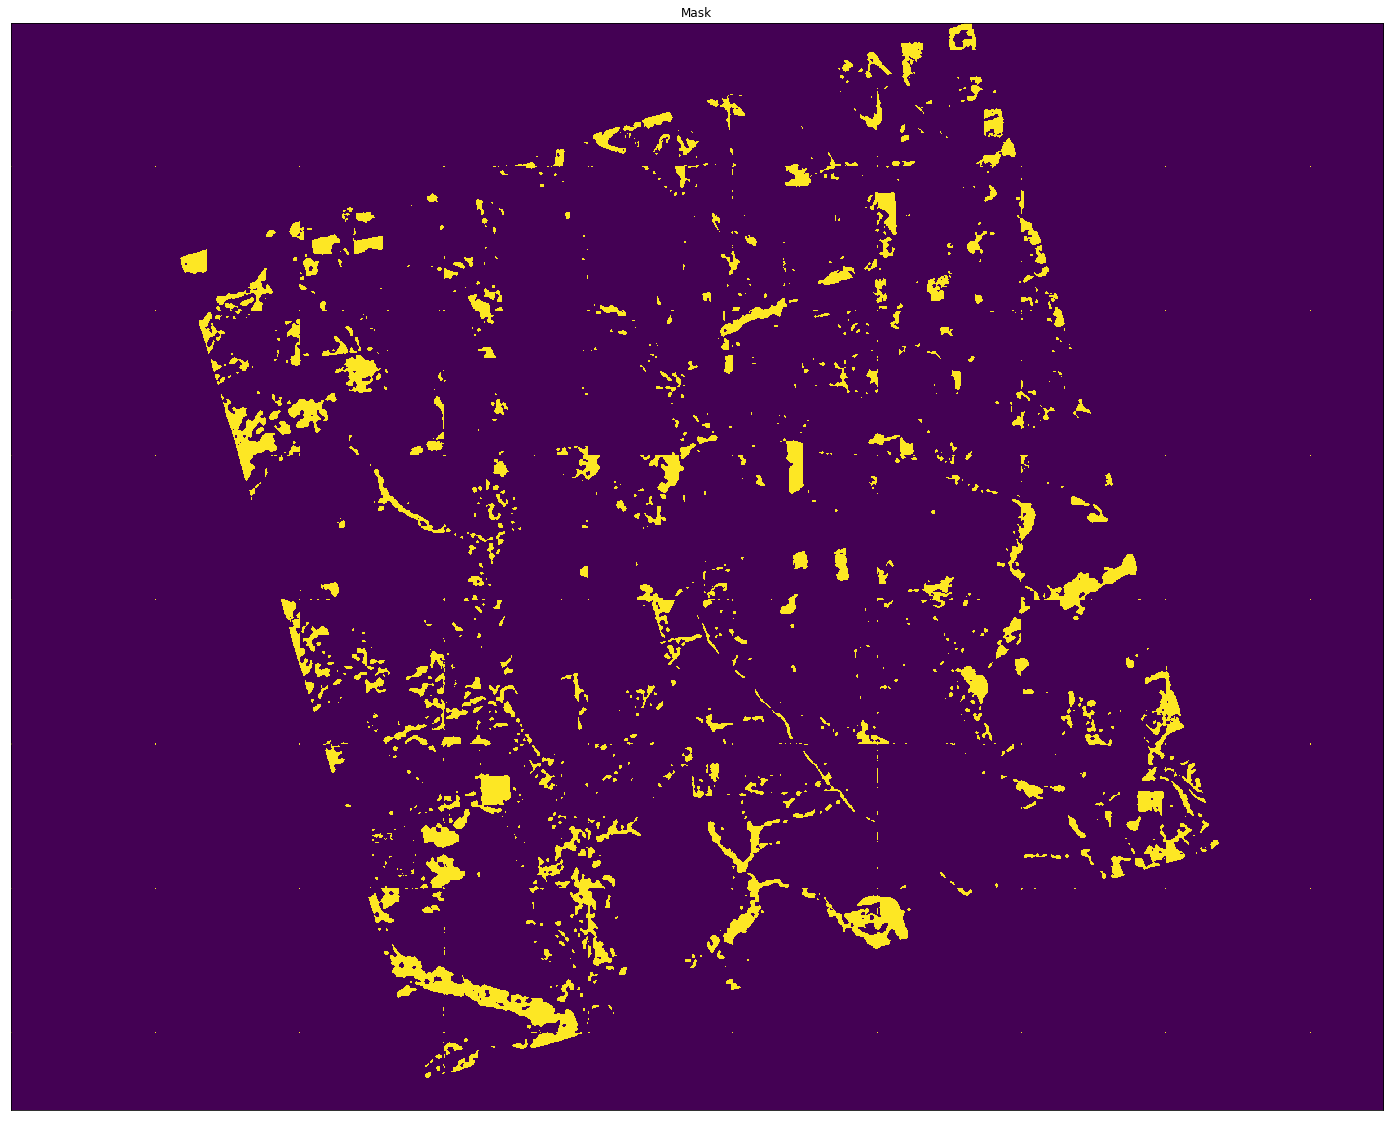

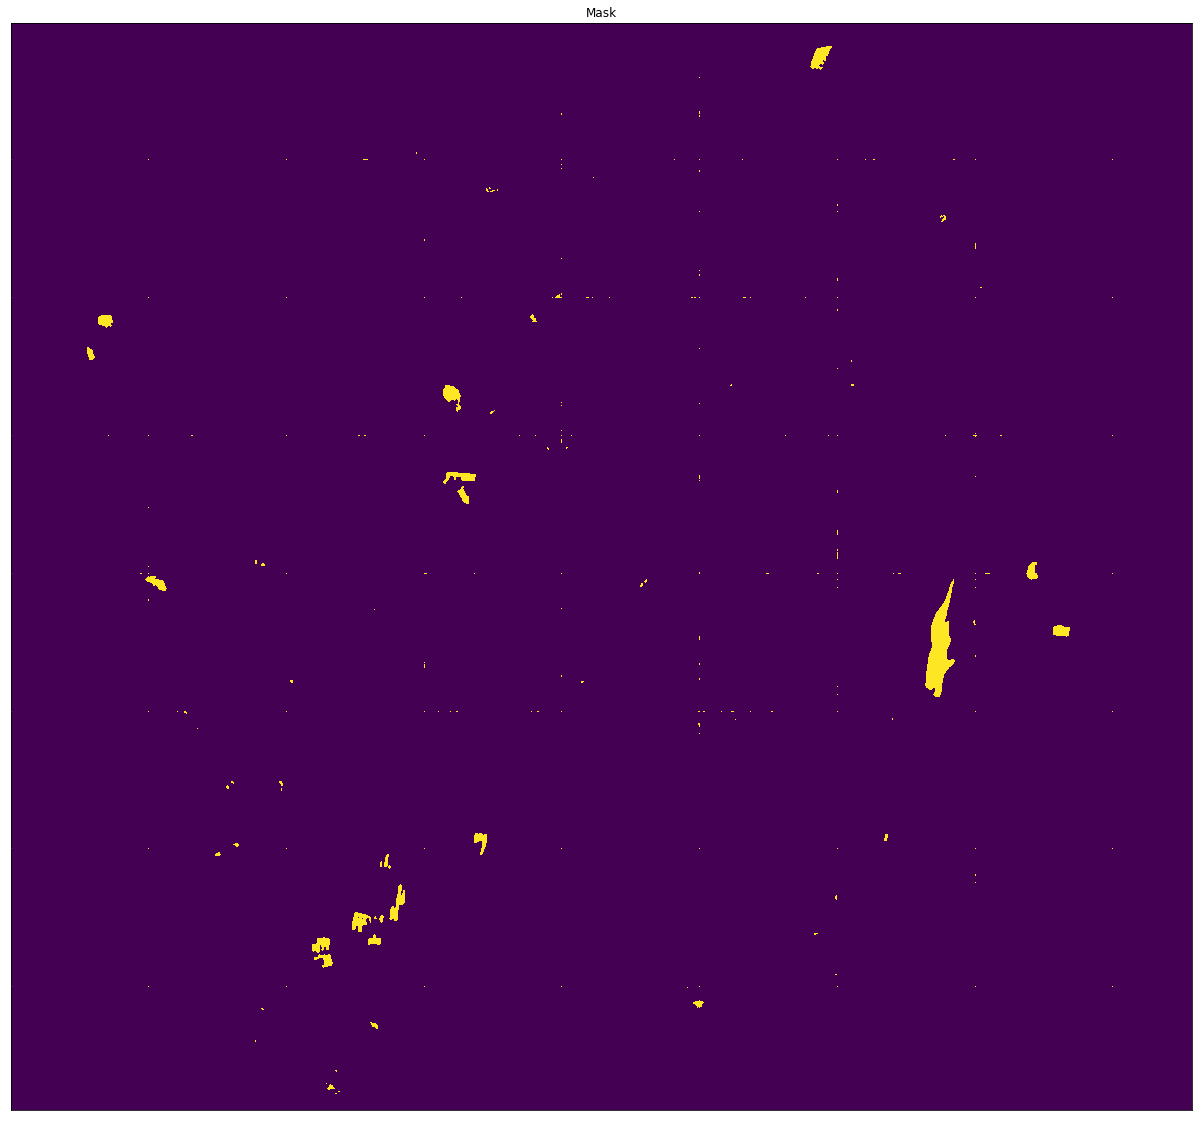

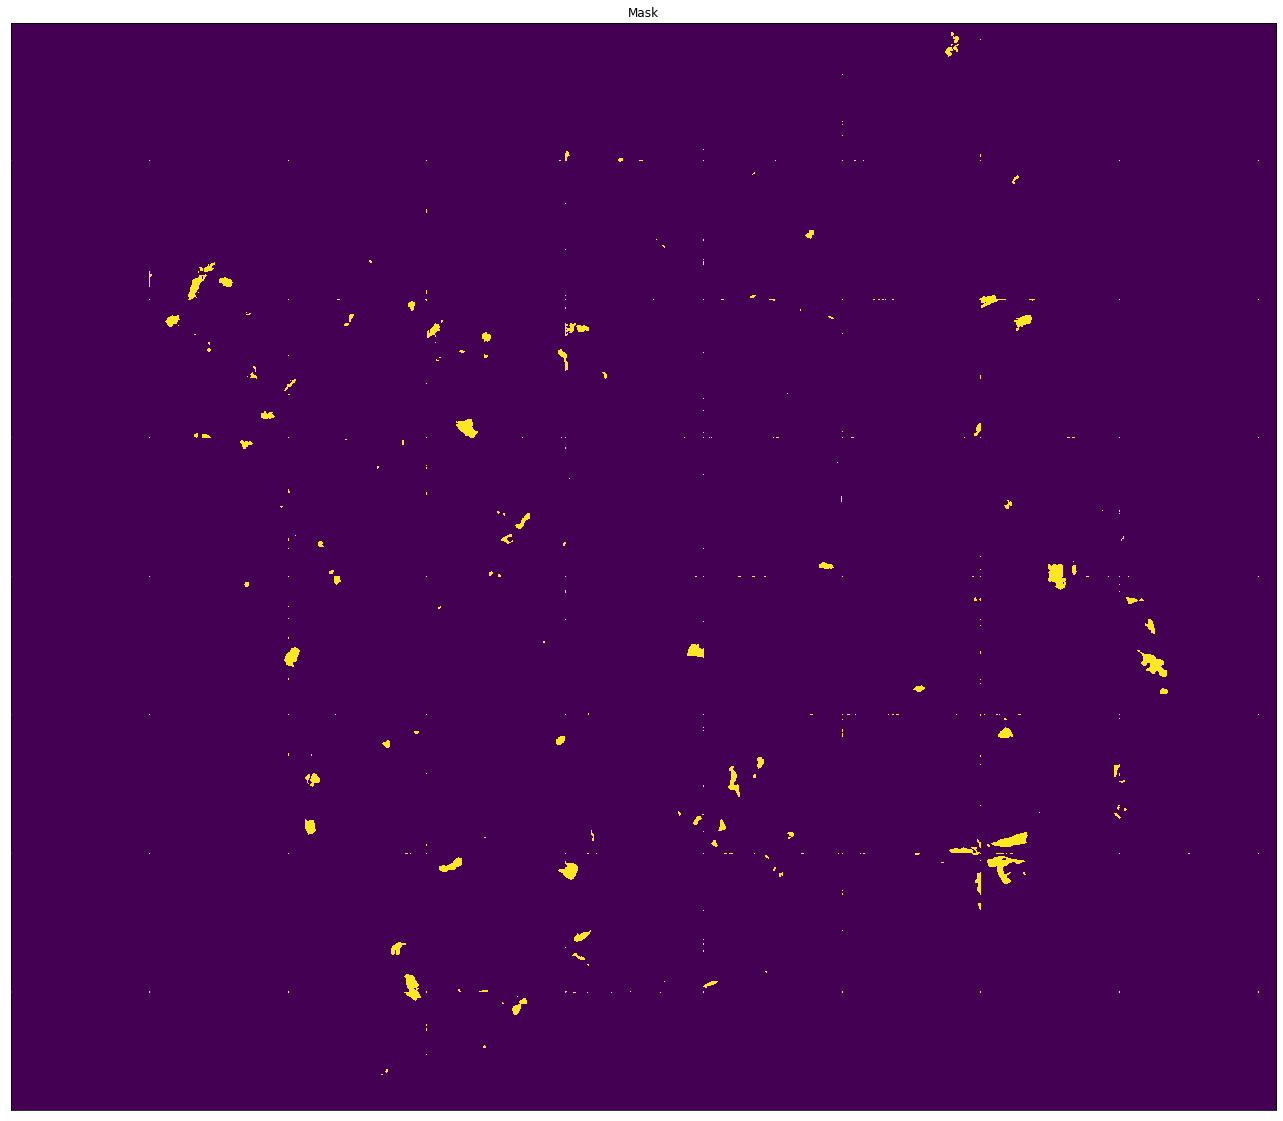

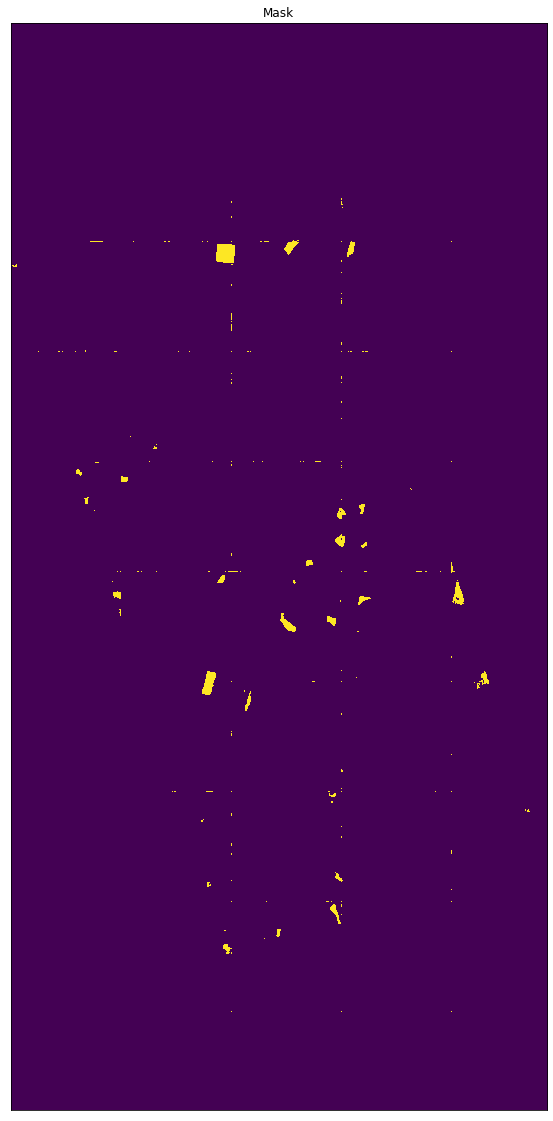

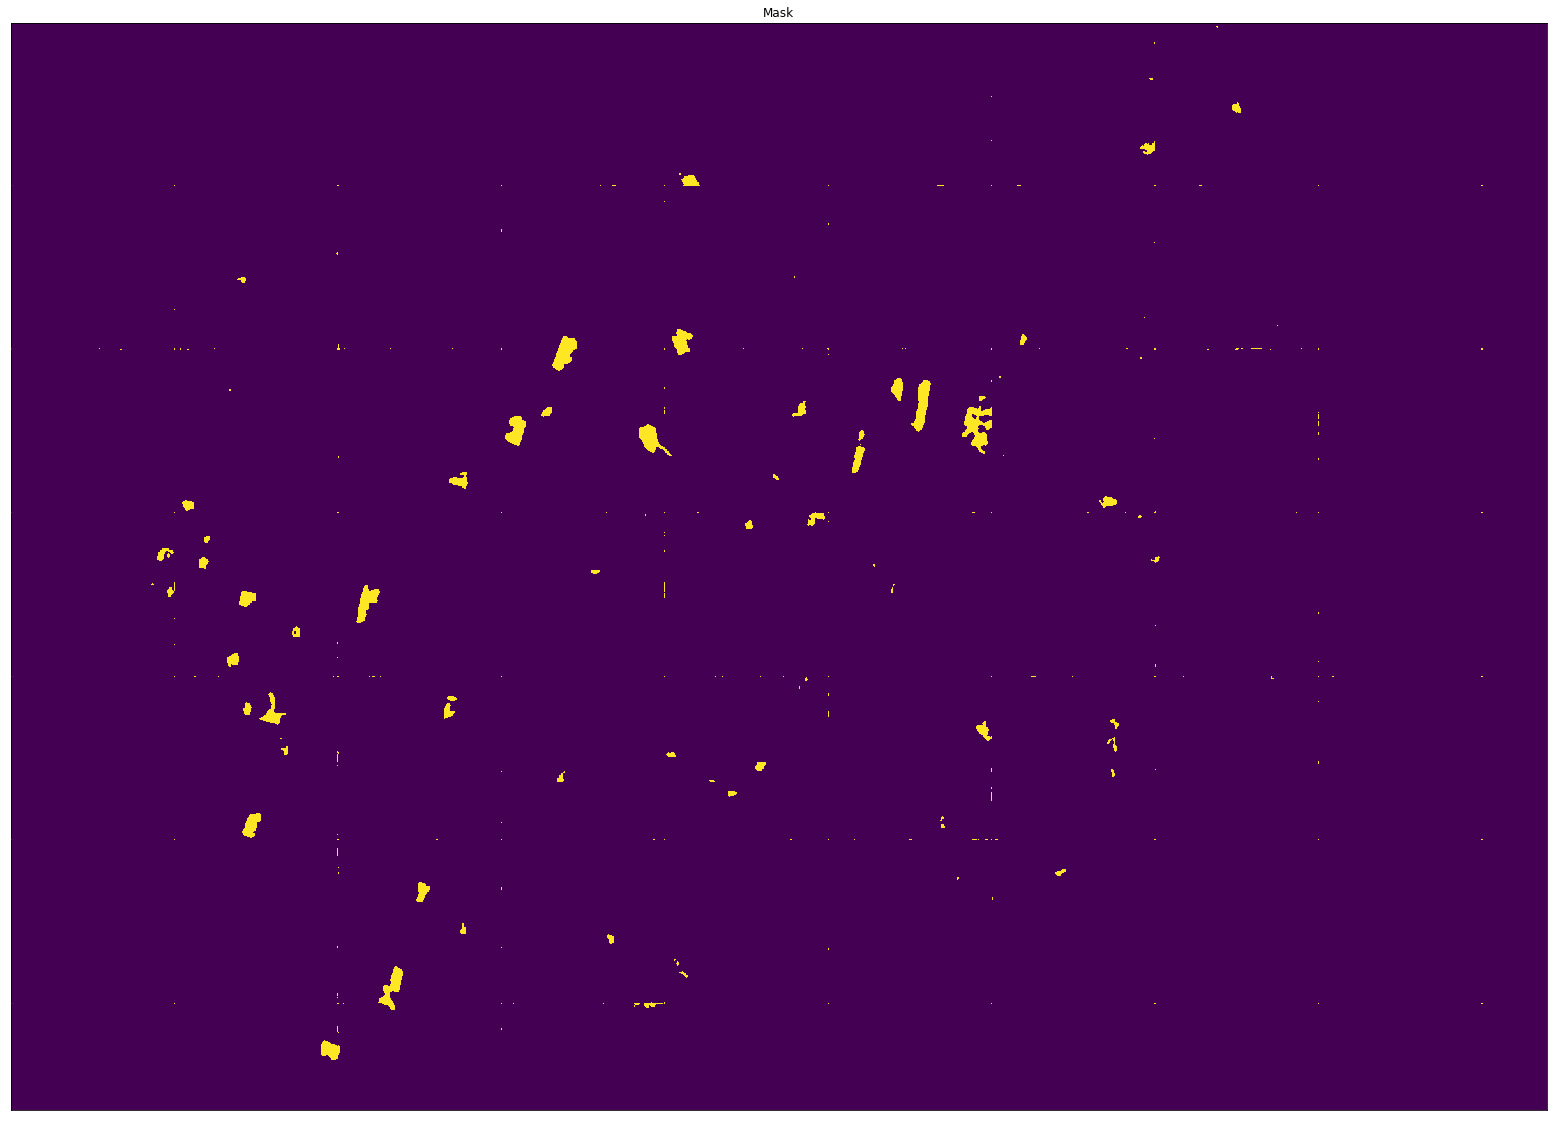

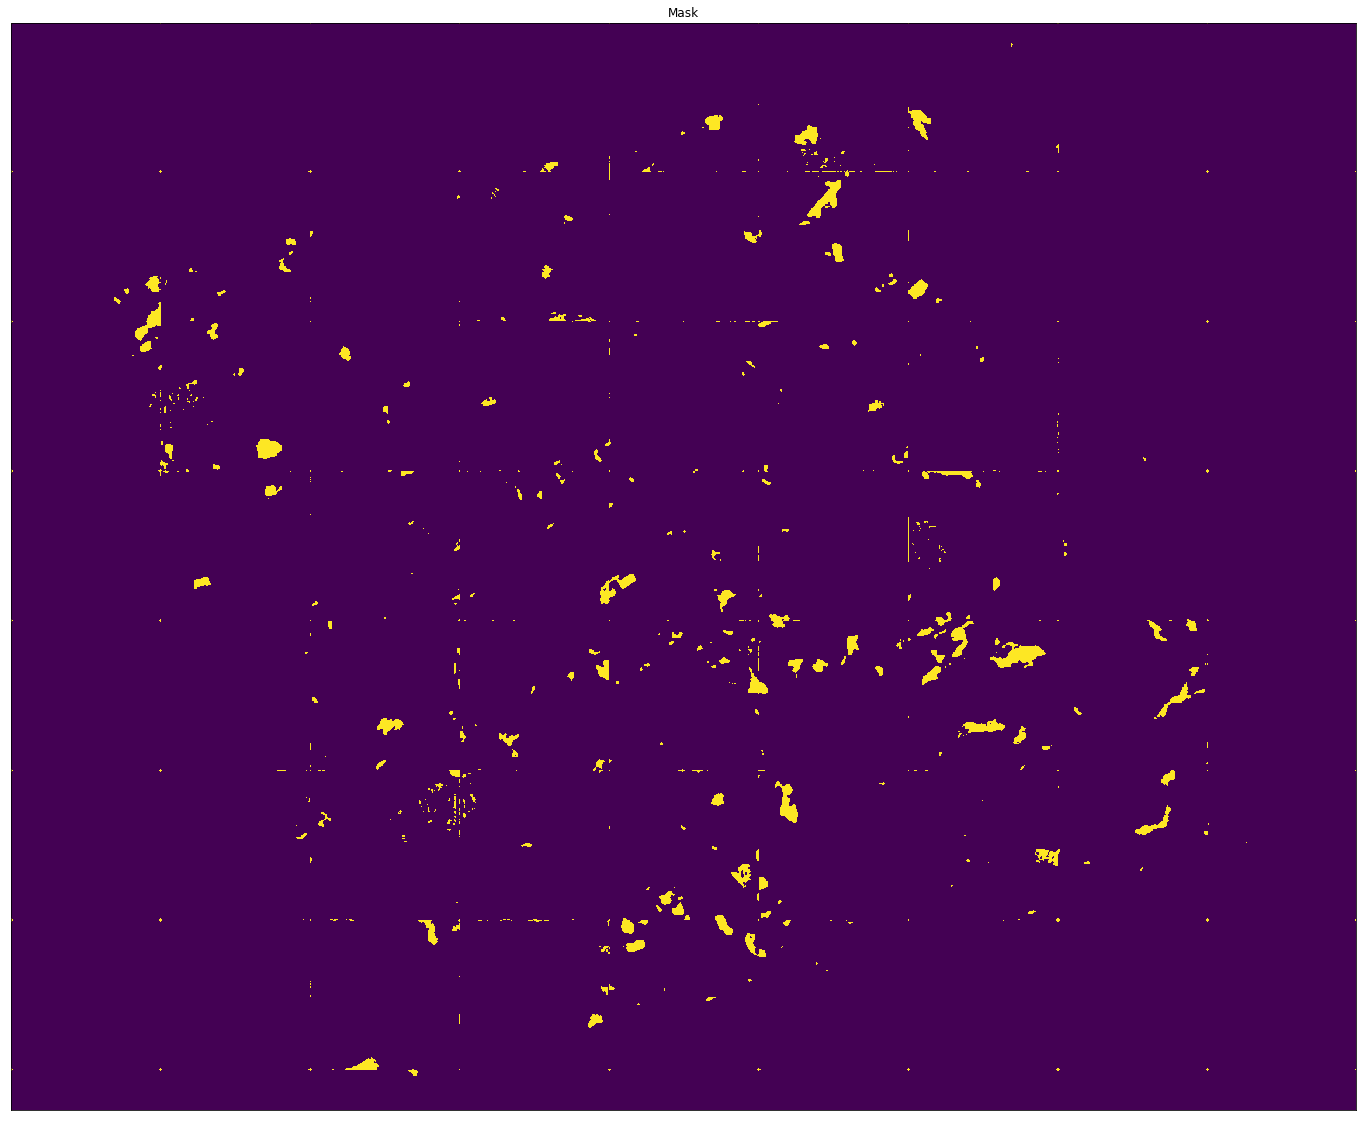

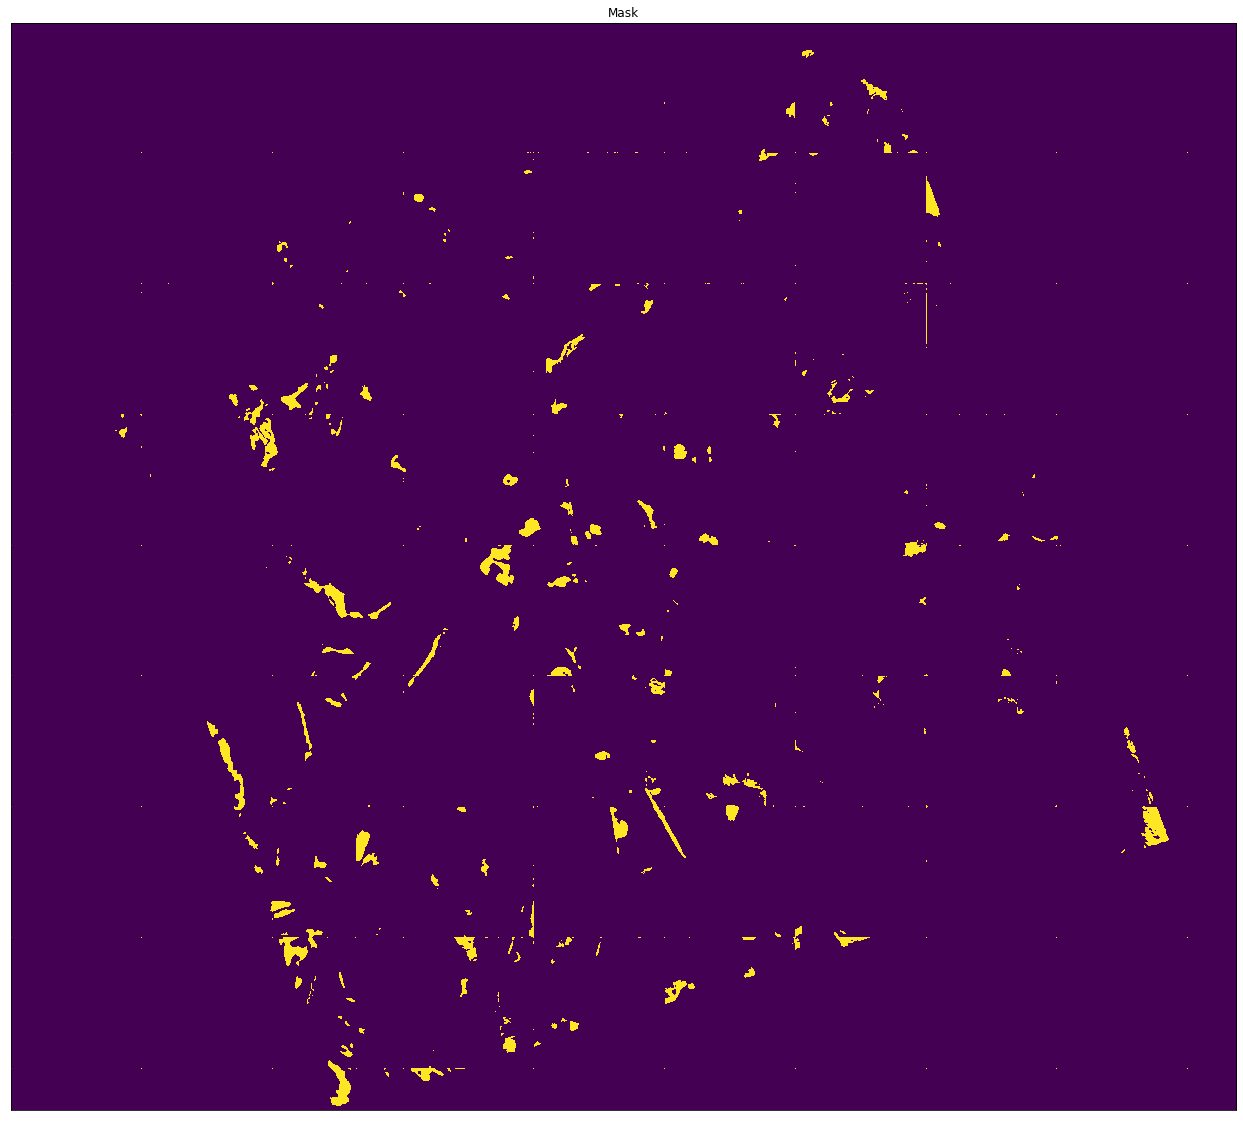

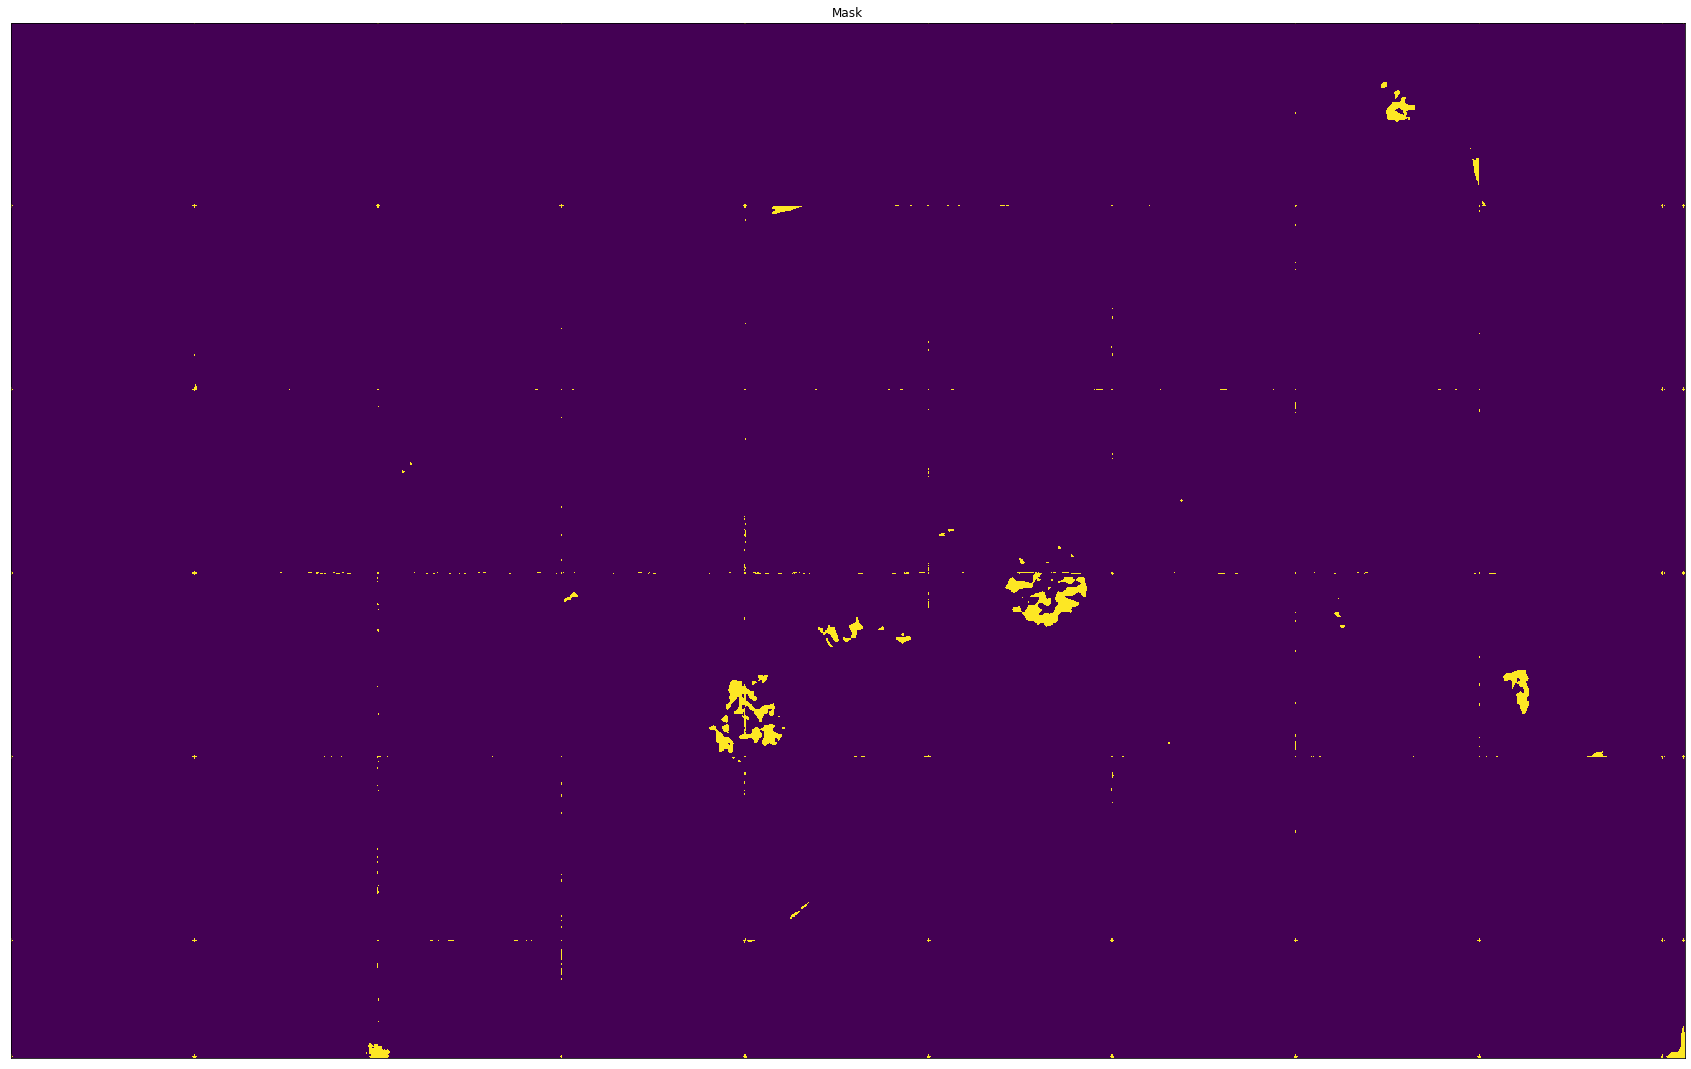

In [262]:
for i in range(len(preds[0])):
    visualize(mask=final[i] > 0.01)

In [254]:
final_final = []
for_vis = []
for i in final:
    for_vis.append(i>0.4)
    final_final.append(decode_mask(i>0.4))

In [255]:
df['mask'] = final_final

In [256]:
df.head()

,Id,mask
0,KVI_20180922_SCN3_UN91__KV1_20190804_SCN2_UN92,293043 4 294583 5 296122 7 297663 6 299203 5 3...
1,KV3_20180702_SCN2_UN47__KV4_20200829_SCN1_UN48,932764 4 934936 3 934945 6 937118 6 937127 7 9...
2,KVI_20180921_SCN9_UN89__KV4_20190622_SCN9_UN90,333879 3 336312 4 338745 4 338956 3 341179 3 3...
3,KV1_20180615_SCN9_UN39__KV3_20200522_SCN9_UN40,855051 12 857296 37 859549 39 861801 41 864054...
4,KV6_20190704_SCN2_UN57__KV5_20200521_SCN10_UN58,464231 28 466042 29 467852 30 469663 30 471473...


In [257]:
df.to_csv('submsission.csv', index=None)